### 토픽 모델링(LDA)
문서의 집합에서 토픽을 찾아내는 프로세스  


In [119]:
import pandas as pd
import re
import urllib.request
import nltk
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pyLDAvis.lda_model
from wordcloud import WordCloud

plt.rc('font', family = 'AppleGothic')

Okt = Okt()
komoran = Komoran()
kkma = Kkma()

In [258]:
def change_category(x):
    x = x.split(' > ')[1]
    if x == '인문':
        x = '인문'

    elif x == '시/에세이':
        x = '시/에세이'

    elif x == '소설':
        x = '소설'

    elif x == '자기계발':
        x = '자기계발'

    else:
        x = 'etc'

    return x

### 슬픔

In [412]:
sad_df = pd.read_csv('./data/교보문고_데이터_최종/교보문고_슬픔_top119.csv')
sad_df['book_type'] = sad_df['book_type'].apply(lambda x: change_category(x))
sad_df = sad_df[sad_df['book_type'] != 'etc']
sad_df.drop('Unnamed: 0', axis=1, inplace=True)
sad_text = sad_df['info_text']
sad_text.head(10)

0    만약 네가 먼저 죽는다면나는 너를 먹을 거야.그래야 너 없이도 죽지 않고 살 수 있...
1    “슬픔을 위로하고 감싸주는 더 큰 슬픔의 힘” _오정희(소설가)백 년의 시간을 감싸...
2    “한 사람을 조금 덜 외롭게 해보려고 애쓰던 시간들이 흘러갔다.”우리 삶 속에 상실...
3    ∞ 김용택 시인이 권하는 따라 쓰기 좋은 시 101‘섬진강 시인’이란 별칭으로 잘 ...
4    문장에 담길 수 있는 아름다움의 극치눈부시게 서툴렀던 시절에 바치는 백수린 첫 장편...
5    전 세계에 파문을 던진 아자르의 충격!. 열네 살 소년 모모가 들려주는 신비롭고 경...
6    더욱 더 깊어진 평론가 신형철의 생각과 문장을 만나다!. 문학평론가 신형철의 두 번...
7    한국과학문학상 장편 부문 대상, SF어워드 장편 부문 우수상 수상 작가천선란 연작소...
8    독일의 대문호인 저자가 25세 되던 해 봄, 이미 약혼자가 있는 샤로테 부프를 사랑...
9    법무사이자 시인인 조재형의 두 번째 산문집 『말을 잃고 말을 얻다』가 ‘오늘을 사는...
Name: info_text, dtype: object

In [413]:
sad_df.reset_index(drop=True, inplace=True)
sad_df

,category,book_name,book_explain,author,publisher,publish_date,price,rate,book_imgurl,keywords,book_type,info_text,num_of_page
0,슬픔,구의 증명,(은행나무 시리즈 N 7),최진영 저자(글),은행나무,2023년 4월 26일,"10,800원",9.58,https://contents.kyobobook.co.kr/sih/fit-in/20...,비극 은행나무 지독 한국 문학 관형사 제의,소설,만약 네가 먼저 죽는다면나는 너를 먹을 거야.그래야 너 없이도 죽지 않고 살 수 있...,192쪽
1,슬픔,밝은 밤,최은영 첫 장편소설,최은영 저자(글),문학동네,2021년 7월 27일,"13,950원",9.84,https://contents.kyobobook.co.kr/sih/fit-in/20...,한국소설 사랑 위로 할머니 지연 증조할머니,소설,“슬픔을 위로하고 감싸주는 더 큰 슬픔의 힘” _오정희(소설가)백 년의 시간을 감싸...,344쪽
2,슬픔,나는 오래된 거리처럼 너를 사랑하고,진은영 시집 (문학과지성 시인선 572),진은영 저자(글),문학과지성사,2022년 8월 31일,"10,800원",9.63,https://contents.kyobobook.co.kr/sih/fit-in/20...,한국시 신작 시집 신형철 현대시 시인 일상,시/에세이,“한 사람을 조금 덜 외롭게 해보려고 애쓰던 시간들이 흘러갔다.”우리 삶 속에 상실...,140쪽
3,슬픔,어쩌면 별들이 너의 슬픔을 가져갈지도 몰라,김용택의 꼭 한번 필사하고 싶은 시 (감성치유 라이팅북),김용택 엮음,위즈덤하우스,2022년 11월 1일,"14,220원",9.48,https://contents.kyobobook.co.kr/sih/fit-in/20...,한국시 이성복 김혜순 현대시 천양희 필사,시/에세이,∞ 김용택 시인이 권하는 따라 쓰기 좋은 시 101‘섬진강 시인’이란 별칭으로 잘 ...,280쪽
4,슬픔,눈부신 안부,백수린 장편소설,백수린 저자(글),문학동네,2023년 5월 24일,"14,400원",9.62,https://contents.kyobobook.co.kr/sih/fit-in/20...,첫사랑 해미 이모 선자 파독 언니,소설,문장에 담길 수 있는 아름다움의 극치눈부시게 서툴렀던 시절에 바치는 백수린 첫 장편...,316쪽
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,슬픔,슬픔이 맑다,이복규 시집 (지혜사랑 184),이복규 저자(글),지혜,2018년 2월 28일,"8,100원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,마태복음 식물 인간 황학동 각방 후유 청량리,시/에세이,『슬픔이 맑다』에서 시인이 내보이는 슬픔은 대개 시인 자신의 고통과 슬픔을 슬퍼하는...,120쪽
85,슬픔,전쟁의 슬픔,(아시아 문학선 1),"바오 닌 저자(글), 하재홍 번역",아시아,2012년 5월 10일,"12,150원",8.65,https://contents.kyobobook.co.kr/sih/fit-in/20...,첫사랑 전쟁터 전우 피비린내 전장 미궁,소설,"비극적인 전쟁의 역사, 그리고 애달픈 첫사랑!. 베트남 작가 바오 닌의 대표작 『전...",350쪽
86,슬픔,슬픔은 어깨로 운다,이재무 시집 (시작시인선 232),이재무 저자(글),천년의시작,2017년 6월 9일,"8,100원",9.55,https://contents.kyobobook.co.kr/sih/fit-in/20...,염무웅 풍화 작용 교향악 홍용희 눈부처 우거지,시/에세이,한국 서정시의 중심에 서서 일상의 경험적 진실성을 서정의 세계로 끌어올린 시인이라 ...,116쪽
87,슬픔,맑은 슬픔,공광규 산문,공광규 저자(글),교유서가,2016년 9월 29일,"12,150원",8.57,https://contents.kyobobook.co.kr/sih/fit-in/20...,소주병 양생 시학 모텔 오솔길 서정시,시/에세이,공광규 시인의 시와 문학에 관한 자전적 고백을 담은 산문집『맑은 슬픔』. 고향에서의...,308쪽


In [414]:
# 기본 전처리: 기호/숫자 제거

def preprocess_text(text):
    text = re.sub(r'[.,!?]', '', text)
    text = re.sub(r'["“”()]+', '', text)
    text = re.sub(r'[\u300a\u300b\u3008\u3009]', '', text)
    text = re.sub(r'\d', '', text)
    text = text.replace("‘", "").replace("’", "").replace('『','').replace('』','')
    return text

cleaned_sad_text = [preprocess_text(text) for text in sad_text]
cleaned_sad_text[0]

'만약 네가 먼저 죽는다면나는 너를 먹을 거야그래야 너 없이도 죽지 않고 살 수 있어 사랑 후 남겨진 것들에 관한 숭고할 만큼 아름다운 이야기최진영 소설 구의 증명은 사랑하는 연인의 갑작스러운 죽음 이후 겪게 되는 상실과 애도의 과정을 통해 삶의 의미 혹은 죽음의 의미를 되묻는 소설이다 이 작품에서 최진영은 퇴색하지 않는 사랑의 가치를 전면에 내세우고 아름다운 문장과 감성적이며 애절한 감수성을 통해 젊고 아름다운 남녀의 열정적인 사랑과 냉정한 죽음에 대해 세련된 감성과 탁월한 문체로 담아내고 있다'

In [415]:
# 토큰화 방법 1. komoran -- 명사 추출 성능이 가장 좋음!
tokenized_text = [komoran.nouns(row) for row in cleaned_sad_text]
print(' '.join(tokenized_text[0]))
print('tokenized_text cnt: ' + str(len(tokenized_text[0])))

거 죽지 수 사랑 후 것 만큼 이야기 최진영 소설 구 증명 사랑 연인 죽음 이후 상실 애도 과정 삶의 의미 죽음 의미 소설 작품 최진영 퇴색 사랑 가치 전면 문장 감성 감수성 남녀 열정 사랑 냉정 죽음 감성 문체
tokenized_text cnt: 39


In [416]:
# 토큰화 방법 2. okt (기존 방법)
# tokenized_text1 = [Okt.nouns(row) for row in cleaned_sad_text]
# print(' '.join(tokenized_text1[0]))
# print('tokenized_text cnt: ' + str(len(tokenized_text1[0])))

In [417]:
# 토큰화 방법 3. kkma
# tokenized_text2 = [kkma.nouns(row) for row in cleaned_sad_text]
# print(' '.join(tokenized_text2[0]))
# print('tokenized_text cnt: ' + str(len(tokenized_text2[0])))

In [418]:
# 불용어 제거 1: 불용어 사전 활용
f = open('./preprocessing/stopwords-ko.txt', 'r')
lines = f.readlines()
stopwords = []
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()

dic_filtered_text = []

for text in tokenized_text:
    filtered_list = [token for token in text if token not in stopwords]
    dic_filtered_text.append(filtered_list)

print(' '.join(dic_filtered_text[0]))
print('filtered_text cnt: ' + str(len(dic_filtered_text[0])))



거 죽지 수 사랑 후 최진영 증명 사랑 연인 죽음 이후 상실 애도 과정 삶의 의미 죽음 의미 최진영 퇴색 사랑 가치 전면 문장 감성 감수성 남녀 열정 사랑 냉정 죽음 감성 문체
filtered_text cnt: 32


In [419]:
# 불용어 제거 2: 한글자 제거

one_filtered_text = []

for text in dic_filtered_text:
    filtered_list = [token for token in text if len(token) != 1]
    one_filtered_text.append(filtered_list)

print(' '.join(one_filtered_text[0]))
print('one_filtered_text cnt: ' + str(len(one_filtered_text[0])))

죽지 사랑 최진영 증명 사랑 연인 죽음 이후 상실 애도 과정 삶의 의미 죽음 의미 최진영 퇴색 사랑 가치 전면 문장 감성 감수성 남녀 열정 사랑 냉정 죽음 감성 문체
one_filtered_text cnt: 29


In [420]:
# 토큰화된 파일 역토큰화
# TfidVectorizer는 토큰화되어있지 않은 텍스트 데이터를 입력으로 사용하기 때문

detokenized_doc = []
for i in range(len(one_filtered_text)):
    t = ' '.join(one_filtered_text[i])
    detokenized_doc.append(t)

In [421]:
# TF-IDF 행렬 변환
vectorizer = TfidfVectorizer(max_features= 200)
X = vectorizer.fit_transform(detokenized_doc)

print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (89, 200)


In [422]:
# 최적의 토픽 수 결정하기
# perplexity

for num_topics in range(3, 10):  # 토픽 수 범위 설정
    lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online',random_state=777,max_iter=1)
    lda.fit(X)
    perplexity = lda.perplexity(X)

    print(f"토픽 {num_topics}개: { perplexity}")


토픽 3개: 931.1994344098858
토픽 4개: 1887.816301751494
토픽 5개: 4205.404768418519
토픽 6개: 10118.995404436826
토픽 7개: 26488.70672395385
토픽 8개: 74819.51218076861
토픽 9개: 224339.51558006095


In [423]:
lda_model = LatentDirichletAllocation(n_components=3,learning_method='online',random_state=777,max_iter=1)
lda_top = lda_model.fit_transform(X)

print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.85475759 0.90854996 0.99864503 0.99094358 0.80024024 1.19075777
  1.16307185 1.17446997 1.0205079  0.83652712 1.10400642 1.08944704
  0.94726398 0.94867701 1.1286183  1.00121279 1.09441879 0.99244127
  0.98945943 0.79272398 0.83530334 0.9231266  1.08643301 0.89703543
  0.80766351 0.84180493 1.19785574 0.92768826 0.72264595 1.04681761
  0.92453437 0.83387131 0.95053016 1.03166947 0.94048676 0.90435064
  1.07154623 0.92183605 0.89634407 0.90457978 0.96158221 1.03766017
  0.934312   0.92134571 0.89110122 1.15614669 0.99509446 0.98436579
  1.04739728 0.81610187 0.93023504 0.84207583 1.0129942  0.93796642
  0.93389747 1.09835458 1.02602971 1.00069147 0.85831099 0.84570109
  0.85821604 0.89003061 1.25006671 1.02473124 0.99458174 0.99355119
  1.09769502 0.96511256 0.90709639 0.93361172 0.92578026 0.70478018
  0.9675119  0.88785474 0.84627793 1.03627263 1.19787125 0.89740932
  0.84047109 1.05989248 1.1357877  0.8662235  1.09855483 1.02766123
  0.84318878 0.853288   0.9433305  0.95338352 0.

In [424]:
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms,15)

Topic 1: [('세계', 1.43), ('슬픔', 1.41), ('필사', 1.29), ('발표', 1.25), ('위로', 1.22), ('사랑', 1.2), ('기쁨', 1.2), ('감동', 1.19), ('개인', 1.17), ('감성', 1.16), ('등단', 1.16), ('시와', 1.15), ('존재', 1.14), ('제목', 1.14), ('출간', 1.14)]
Topic 2: [('사랑', 1.48), ('실제', 1.4), ('세상', 1.33), ('모모', 1.33), ('자리', 1.31), ('언어', 1.28), ('기록', 1.22), ('전쟁', 1.22), ('역사', 1.21), ('바탕', 1.21), ('변호사', 1.21), ('가난', 1.2), ('단편', 1.19), ('현실', 1.18), ('태도', 1.15)]
Topic 3: [('슬픔', 2.1), ('이해', 1.47), ('사랑', 1.38), ('발견', 1.35), ('상실', 1.3), ('애도', 1.29), ('순간', 1.28), ('우울', 1.24), ('불안', 1.23), ('시리즈', 1.23), ('고통', 1.23), ('엄마', 1.22), ('산문집', 1.2), ('김용택', 1.19), ('글쓰기', 1.18)]


/usr/local/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


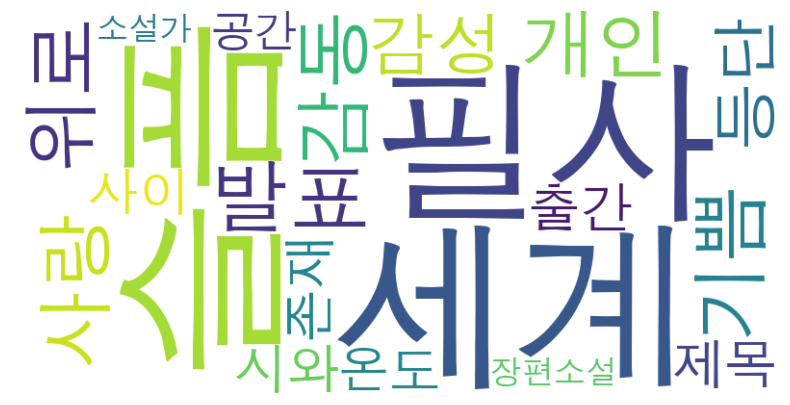

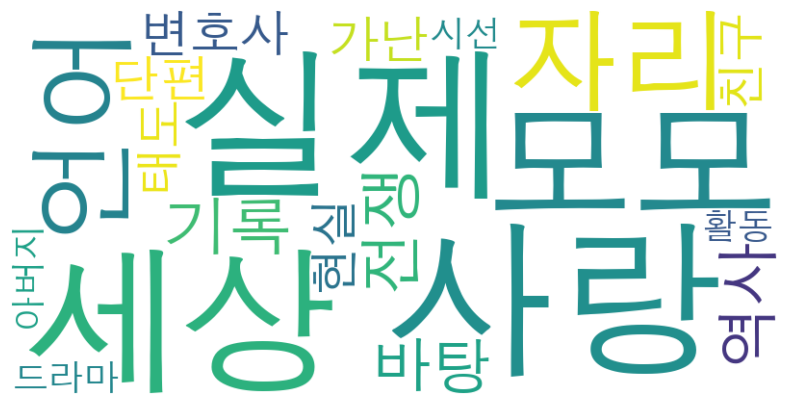

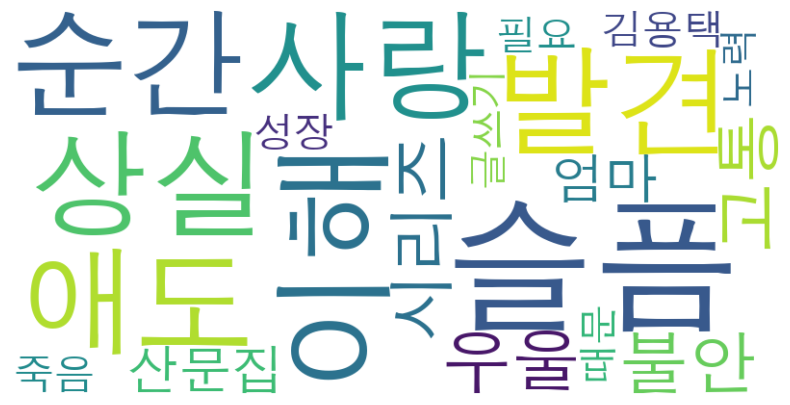

In [425]:
def create_wordcloud(word_weights, terms, title):
    num_top_words = 20

    top_words = []
    for weights in word_weights:
        top_word_indices = weights.argsort()[-num_top_words:]
        top_words.append(top_word_indices)

    wordcloud = WordCloud(width=800, height=400, font_path='AppleGothic', background_color='white')

    for idx, words in enumerate(top_words):
        word_freq = {word: word_weights[idx][word] for word in words}
        word_freq = {terms[word]: weight for word, weight in word_freq.items()}
        wordcloud.generate_from_frequencies(word_freq)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        # plt.title(f'Topic {idx + 1} Word Cloud')

        file_name = f"{title}_topic_{idx + 1}.png"
        plt.savefig(file_name, bbox_inches='tight')

        plt.show()

create_wordcloud(lda_model.components_, terms, '슬픔')

In [426]:
doc_topics = lda_model.transform(X)
print(doc_topics.shape)
print(doc_topics[:2])

(89, 3)
[[0.11082458 0.11285851 0.77631691]
 [0.85237945 0.07311131 0.07450925]]


In [427]:
filename_list = sad_df['book_name']
topic_names = ['Topic #' + str(i) for i in range(1,4)]
topic_df = pd.DataFrame(data=doc_topics, columns=topic_names, index=filename_list)
topic_df.head(20)

,Topic #1,Topic #2,Topic #3
book_name,,,
구의 증명,0.110825,0.112859,0.776317
밝은 밤,0.852379,0.073111,0.074509
나는 오래된 거리처럼 너를 사랑하고,0.087236,0.824727,0.088037
어쩌면 별들이 너의 슬픔을 가져갈지도 몰라,0.851712,0.073471,0.074817
눈부신 안부,0.859725,0.070332,0.069944
자기 앞의 생,0.096069,0.802511,0.101420
슬픔을 공부하는 슬픔,0.087630,0.088524,0.823846
이끼숲,0.811826,0.093977,0.094197
젊은 베르테르의 슬픔,0.126278,0.740501,0.133221


In [428]:
topic_modeling_results = topic_df
topic_modeling_results['topic'] = topic_modeling_results.idxmax(axis=1)
topic_modeling_results['probability'] = topic_modeling_results[['Topic #1', 'Topic #2', 'Topic #3']].astype(float).max(axis=1)
topic_modeling_results

,Topic #1,Topic #2,Topic #3,topic,probability
book_name,,,,,
구의 증명,0.110825,0.112859,0.776317,Topic #3,0.776317
밝은 밤,0.852379,0.073111,0.074509,Topic #1,0.852379
나는 오래된 거리처럼 너를 사랑하고,0.087236,0.824727,0.088037,Topic #2,0.824727
어쩌면 별들이 너의 슬픔을 가져갈지도 몰라,0.851712,0.073471,0.074817,Topic #1,0.851712
눈부신 안부,0.859725,0.070332,0.069944,Topic #1,0.859725
...,...,...,...,...,...
슬픔이 맑다,0.118605,0.120765,0.760630,Topic #3,0.760630
전쟁의 슬픔,0.144226,0.710594,0.145180,Topic #2,0.710594
슬픔은 어깨로 운다,0.088367,0.816092,0.095541,Topic #2,0.816092


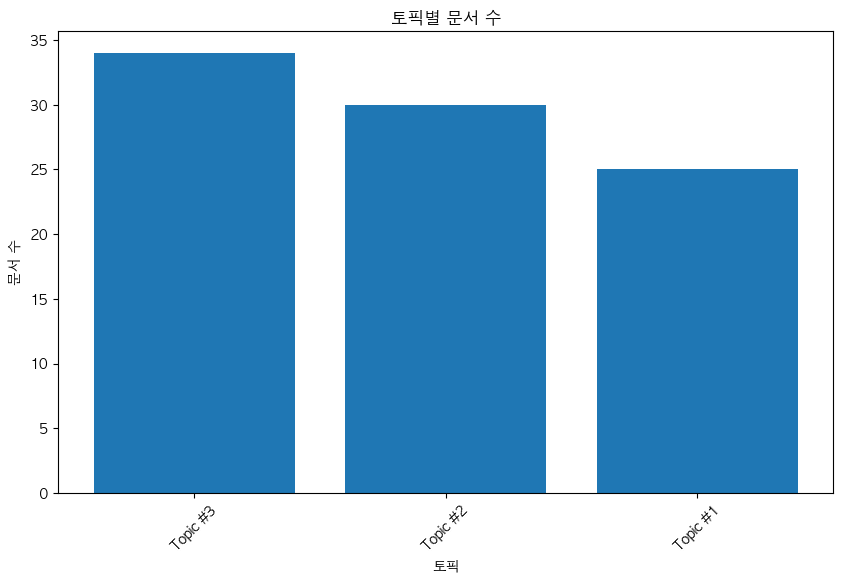

In [429]:
topic_document_counts = topic_modeling_results['topic'].value_counts().reset_index()
topic_document_counts.columns = ['토픽', '문서 수']

plt.figure(figsize=(10, 6))
plt.bar(topic_document_counts['토픽'], topic_document_counts['문서 수'])
plt.title('토픽별 문서 수')
plt.xlabel('토픽')
plt.ylabel('문서 수')
plt.xticks(rotation=45)
plt.show()

In [430]:
def create_vis(model):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.lda_model.prepare(lda_model, X, vectorizer)
    return vis

sad_vis = create_vis(lda_model)
pyLDAvis.save_html(sad_vis, '슬픔_visualization.html')
sad_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.002887 -0.000540       1        1  37.408160
1      0.002017 -0.001768       2        1  32.951271
0      0.000870  0.002308       3        1  29.640568, topic_info=    Term      Freq     Total Category  logprob  loglift
96    세계  1.000000  1.000000  Default  30.0000  30.0000
113   실제  1.000000  1.000000  Default  29.0000  29.0000
49    모모  1.000000  1.000000  Default  28.0000  28.0000
186   필사  1.000000  1.000000  Default  27.0000  27.0000
5     감동  1.000000  1.000000  Default  26.0000  26.0000
..   ...       ...       ...      ...      ...      ...
22    군가  0.490214  1.514972   Topic3  -5.1720   0.0877
10    경험  0.498144  1.583237   Topic3  -5.1559   0.0597
76    사랑  0.540497  2.040305   Topic3  -5.0743  -0.1123
55   문학상  0.495594  1.585922   Topic3  -5.1611   0.0529
16    과정  0.493818  1.567417   Topic3  -5.1646   0.0610

[154 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         2  0.678536   가난
2         1  0.606330   가족
2         2  0.606330   가족
5         3  0.736409   감동
6         1  0.649395   감성
...     ...       ...  ...
194       2  0.606554   현실
195       2  0.729151   홍콩
197       1  0.627996   활동
197       2  0.627996   활동
199       1  0.677792   희망

[139 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [431]:
topic_modeling_results.reset_index(inplace=True)

In [432]:
# topic_modeling_results.to_excel('슬픔_topic_probability.xlsx', index=False)

In [433]:
labeling_sad_df = sad_df
labeling_sad_df['topic'] = topic_modeling_results['topic']
labeling_sad_df['probability'] = topic_modeling_results['probability']
labeling_sad_df

,category,book_name,book_explain,author,publisher,publish_date,price,rate,book_imgurl,keywords,book_type,info_text,num_of_page,topic,probability
0,슬픔,구의 증명,(은행나무 시리즈 N 7),최진영 저자(글),은행나무,2023년 4월 26일,"10,800원",9.58,https://contents.kyobobook.co.kr/sih/fit-in/20...,비극 은행나무 지독 한국 문학 관형사 제의,소설,만약 네가 먼저 죽는다면나는 너를 먹을 거야.그래야 너 없이도 죽지 않고 살 수 있...,192쪽,Topic #3,0.776317
1,슬픔,밝은 밤,최은영 첫 장편소설,최은영 저자(글),문학동네,2021년 7월 27일,"13,950원",9.84,https://contents.kyobobook.co.kr/sih/fit-in/20...,한국소설 사랑 위로 할머니 지연 증조할머니,소설,“슬픔을 위로하고 감싸주는 더 큰 슬픔의 힘” _오정희(소설가)백 년의 시간을 감싸...,344쪽,Topic #1,0.852379
2,슬픔,나는 오래된 거리처럼 너를 사랑하고,진은영 시집 (문학과지성 시인선 572),진은영 저자(글),문학과지성사,2022년 8월 31일,"10,800원",9.63,https://contents.kyobobook.co.kr/sih/fit-in/20...,한국시 신작 시집 신형철 현대시 시인 일상,시/에세이,“한 사람을 조금 덜 외롭게 해보려고 애쓰던 시간들이 흘러갔다.”우리 삶 속에 상실...,140쪽,Topic #2,0.824727
3,슬픔,어쩌면 별들이 너의 슬픔을 가져갈지도 몰라,김용택의 꼭 한번 필사하고 싶은 시 (감성치유 라이팅북),김용택 엮음,위즈덤하우스,2022년 11월 1일,"14,220원",9.48,https://contents.kyobobook.co.kr/sih/fit-in/20...,한국시 이성복 김혜순 현대시 천양희 필사,시/에세이,∞ 김용택 시인이 권하는 따라 쓰기 좋은 시 101‘섬진강 시인’이란 별칭으로 잘 ...,280쪽,Topic #1,0.851712
4,슬픔,눈부신 안부,백수린 장편소설,백수린 저자(글),문학동네,2023년 5월 24일,"14,400원",9.62,https://contents.kyobobook.co.kr/sih/fit-in/20...,첫사랑 해미 이모 선자 파독 언니,소설,문장에 담길 수 있는 아름다움의 극치눈부시게 서툴렀던 시절에 바치는 백수린 첫 장편...,316쪽,Topic #1,0.859725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,슬픔,슬픔이 맑다,이복규 시집 (지혜사랑 184),이복규 저자(글),지혜,2018년 2월 28일,"8,100원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,마태복음 식물 인간 황학동 각방 후유 청량리,시/에세이,『슬픔이 맑다』에서 시인이 내보이는 슬픔은 대개 시인 자신의 고통과 슬픔을 슬퍼하는...,120쪽,Topic #3,0.760630
85,슬픔,전쟁의 슬픔,(아시아 문학선 1),"바오 닌 저자(글), 하재홍 번역",아시아,2012년 5월 10일,"12,150원",8.65,https://contents.kyobobook.co.kr/sih/fit-in/20...,첫사랑 전쟁터 전우 피비린내 전장 미궁,소설,"비극적인 전쟁의 역사, 그리고 애달픈 첫사랑!. 베트남 작가 바오 닌의 대표작 『전...",350쪽,Topic #2,0.710594
86,슬픔,슬픔은 어깨로 운다,이재무 시집 (시작시인선 232),이재무 저자(글),천년의시작,2017년 6월 9일,"8,100원",9.55,https://contents.kyobobook.co.kr/sih/fit-in/20...,염무웅 풍화 작용 교향악 홍용희 눈부처 우거지,시/에세이,한국 서정시의 중심에 서서 일상의 경험적 진실성을 서정의 세계로 끌어올린 시인이라 ...,116쪽,Topic #2,0.816092
87,슬픔,맑은 슬픔,공광규 산문,공광규 저자(글),교유서가,2016년 9월 29일,"12,150원",8.57,https://contents.kyobobook.co.kr/sih/fit-in/20...,소주병 양생 시학 모텔 오솔길 서정시,시/에세이,공광규 시인의 시와 문학에 관한 자전적 고백을 담은 산문집『맑은 슬픔』. 고향에서의...,308쪽,Topic #1,0.778620


In [434]:
labeling_sad_df.to_csv('슬픔_topic_labeled.csv', index=False)
labeling_sad_df.to_excel('슬픔_topic_labeled.xlsx', index=False)

### 기쁨

In [375]:
happy_df = pd.read_csv('./data/교보문고_데이터_최종/교보문고_기쁨_top165.csv')
happy_df['book_type'] = happy_df['book_type'].apply(lambda x: change_category(x))
happy_df = happy_df[happy_df['book_type'] != 'etc']
happy_df.drop('Unnamed: 0', axis=1, inplace=True)
happy_text = happy_df['info_text']
happy_text.head(10)

1     세상에 알려지지 않은 니체가 여기에 있다일본 아마존 인문 분야 1위, 해당 분야 역...
4     자연에서는 누구도 가난해지지 않는다생태학자 최재천 · 식물세밀화가 이소영 《숲속의 ...
7     모두가 기억하게 될 이름, 장류진이 전하는 오늘의 이야기!. 2018년 창비신인소설...
9     “어느 누구도 상처받지 않은 채 오늘을 살아낼 수는 없다.나는 삶이 나를 얼마나 사...
10    밤을 비추는 등대의 불빛 같은 글,〈삶을 견디는 기쁨〉. 고향, 자연, 예술에 대한...
11    일본 밀리언셀러, 국내 스테디셀러 《초역 니체의 말》에 이은 두 번째 이야기조금 더...
12    우리들의 배우 김혜자의 연기, 인생“그럼에도 불구하고, 생에 감사해”. 한국을 대표...
13    스트레스받지 않는 평화로운 마음,어떤 생각에도 구애받지 않는 자유로운 삶, 그것은 ...
17    곰곰 ‘나’를 들여다보고, 조금씩 마음의 짐을 덜어내며,‘나’답게 살기 위한 작은 ...
18    [그리고 모든 것이 변했다]의 저자 아니타 무르자니(Anita Moorjani)의 ...
Name: info_text, dtype: object

In [376]:
happy_df.reset_index(drop=True, inplace=True)
happy_df

,category,book_name,book_explain,author,publisher,publish_date,price,rate,book_imgurl,keywords,book_type,info_text,num_of_page
0,기쁨,초역 니체의 말,3판,"프리드리히 니체 저자(글), 박재현 번역, 시라토리 하루히코 엮음",삼호미디어,2022년 08월 29일,"14,220원",9.70,https://contents.kyobobook.co.kr/sih/fit-in/20...,산문체 삶 시라토리 친구 기술 이전 인간,인문,"세상에 알려지지 않은 니체가 여기에 있다일본 아마존 인문 분야 1위, 해당 분야 역...",276쪽
1,기쁨,야생의 식탁,자연이 허락한 사계절의 기쁨을 채집하는 삶,"모 와일드 저자(글), 신소희 번역",부키,2023년 10월 25일,"17,820원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,버섯 해초 초학자 채취 최재천 팬케이크,시/에세이,자연에서는 누구도 가난해지지 않는다생태학자 최재천 · 식물세밀화가 이소영 《숲속의 ...,428쪽
2,기쁨,일의 기쁨과 슬픔,장류진 소설집,장류진 저자(글),창비,2019년 10월 25일,"12,600원",9.35,https://contents.kyobobook.co.kr/sih/fit-in/20...,한국현대소설 언니 아주머니 직장생활 거북 직장인,소설,"모두가 기억하게 될 이름, 장류진이 전하는 오늘의 이야기!. 2018년 창비신인소설...",236쪽
3,기쁨,상실의 기쁨,흐릿한 어둠 속에서 인생의 빛을 발견하는 태도에 관하여,"프랭크 브루니 저자(글), 홍정인 번역",웅진지식하우스,2023년 03월 17일,"16,200원",9.53,https://contents.kyobobook.co.kr/sih/fit-in/20...,모기지 뇌졸중 뉴욕 타임스 파친코 항암 치료 센트럴 파크,시/에세이,“어느 누구도 상처받지 않은 채 오늘을 살아낼 수는 없다.나는 삶이 나를 얼마나 사...,412쪽
4,기쁨,삶을 견디는 기쁨,힘든 시절에 벗에게 보내는 편지,"헤르만 헤세 저자(글), 유혜자 번역",문예춘추사,2022년 12월 01일,"14,400원",9.77,https://contents.kyobobook.co.kr/sih/fit-in/20...,NaN,시/에세이,"밤을 비추는 등대의 불빛 같은 글,〈삶을 견디는 기쁨〉. 고향, 자연, 예술에 대한...",312쪽
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,기쁨,우리 모두 가끔은 미칠 때가 있지,"관계, 그 잘 지내기 어려움에 대하여",정지음 저자(글),빅피시,2022년 02월 09일,"13,320원",9.53,https://contents.kyobobook.co.kr/sih/fit-in/20...,인간관계 신작 에세이 쌍방 타인 실망 절취선,시/에세이,"서로의 미침을 인정하는 순간 바뀌는 것들-《젊은 ADHD의 슬픔》의 정지음 작가, ...",240쪽
76,기쁨,집다운 집,내가 살 집을 선택하는 특별한 기준 (아르테 S 3),"송멜로디 저자(글), 요나 저자(글), 무과수 저자(글), 진명현 저자(글)",아르테(arte),2019년 10월 30일,"9,900원",8.33,https://contents.kyobobook.co.kr/sih/fit-in/20...,위로 온기 건축가 습기 요나 집들이,시/에세이,"“집다운 집이란 무엇일까?” 소유가 아닌 거주하는 기쁨에서 발견한, ‘집’이 가장...",208쪽
77,기쁨,호시절,김현 시집 (창비시선 447),김현 저자(글),창비,2020년 08월 10일,"8,100원",8.54,https://contents.kyobobook.co.kr/sih/fit-in/20...,사랑 한국시 김현의 김나영 서정 현대시,시/에세이,“꿈나라에서 들어본 적이 있는 노래를 기다렸어요당신 마음대로 하세요”김현의 독보적인...,236쪽
78,기쁨,마음의 평안과 성공을 위한 4가지 신성한 비밀,아름다운 마음의 혁명은 어떻게 오는가,"프리타지 저자(글), 크리슈나지 저자(글), 추미란 번역",김영사,2020년 01월 25일,"14,400원",9.63,https://contents.kyobobook.co.kr/sih/fit-in/20...,사랑 성공 싱크 철학 로니 김보라,인문,"‘괴로운 상태’에 머물겠는가, ‘아름다운 상태’로 살겠는가!전 세계 CEO와 오피니...",256쪽


In [377]:
# 기본 전처리: 기호/숫자 제거

def preprocess_text(text):
    text = re.sub(r'[.,!?]', '', text)
    text = re.sub(r'["“”()]+', '', text)
    text = re.sub(r'[\u300a\u300b\u3008\u3009]', '', text)
    text = re.sub(r'\d', '', text)
    text = text.replace("‘", "").replace("’", "").replace('『','').replace('』','')
    return text

cleaned_text = [preprocess_text(text) for text in happy_text]
cleaned_text[0]

'세상에 알려지지 않은 니체가 여기에 있다일본 아마존 인문 분야 위 해당 분야 역대 최다 판매 부수를 기록한 베스트셀러 무언가 뚜렷하게 잘못된 것은 없지만 그렇다고 홀가분히 하루를 마치며 편안하게 잠자리에 들 수 없을 때가 있다 딱히 어떤 말로 표현하기는 힘든 막막하고 고독한 이 마음을 누군가에게는 이해받고 또 위로받고 싶은 순간이 있다 초역 니체의 말은 그러한 당신에게 담담한 위로와 희망의 말을 건넨다초역 니체의 말은 역사상 가장 위대한 철학자 중 하나로 꼽히는 프리드리히 니체의 글 가운데 철학과 종교에 관한 해설서의 명쾌함으로 정평이 나 있는 일본의 작가 시라토리 하루히코가 편번역을 맡아 엄선한 편의 명언을 담은 책이다 다소 어렵게 느껴졌던 기존 니체의 분위기에서 벗어나 대중에게 좀 더 가까이 다가갈 수 있도록 새롭게 엮어진 초역 니체의 말은 시대를 뛰어넘는 날카로운 통찰력과 함께 현대를 사는 우리의 내면을 자극하는 섬세한 감성으로 찾아온다 니체의 철학과 강인한 생기 보다 고귀한 자아를 향해 나아가려는 굳은 의지가 참신하고 짧은 산문체의 글 토막에 고스란히 담겨 있다 이미 일본에서는 년 월 출간 시점부터 현재까지 만이 넘는 독자들이 이 책을 통해 희망과 위로를 얻고 있으며 그 행진은 아직까지도 진행형이다왜 이토록 초역 니체의 말에 열광을 하는 것일까 니체의 말은 어떠한 철학자보다 강한 흡입력과 통찰력이 있는 짧은 산문체의 글 토막으로 독자에게 다가온다 타인에게 잘 보이기 위한 나 사회에서 무난하게 살아가기 위한 나를 만드는 충고가 아닌 오로지 제대로 된 나 자체를 발견하는 시간에 대해 이야기하는 책이다 다른 무엇보다 온전한 나를 위한 삶을 먼저 찾아볼 것을 말한다 그 목소리에는 많은 이들이 쉽게 공감할 수 있되 특유의 날카로움은 잃지 않은 담담한 어조로 읊조리는 현실의 감성이 묻어난다 이러한 니체의 말은 복잡한 현대를 살아가는 우리들에게 잠시나마 자신을 되돌아보는 여유와 온기 어린 위로를 가져다준다니체 특유의 날카롭고 직설적인 화법을 통해 마음을 사로잡는 

In [378]:
# 토큰화
tokenized_text = [komoran.nouns(row) for row in cleaned_text]
print(' '.join(tokenized_text[0]))
print('tokenized_text cnt: ' + str(len(tokenized_text[0])))

세상 니체 있다 일본 아마존 인문 분야 위 해당 분야 역대 최다 판매 부수 기록 베스트셀러 잘못 것 하루 편안 잠자리 수 때 말 표현 고독 마음 누 군가 이해 위로 순간 역 니체 말 위로 희망 말 초 역 니체 말 역사 철학자 중 하나로 프리드리히 니체 글 가운데 철학 종교 해설서 정평 일본 작가 시라토리 하루히 코 편 번역 엄선 편의 명언 책 기존 니체 분위기 대중 더 가까이 수 역 니체 말 시대 통찰력 현대 내면 자극 감성 니체 철학 생기 자아 의지 문체 글 토막 일본 년 월 출간 시점 현재 만 독자 책 희망 위로 행진 진행 형 이다 왜 역 니체 말 열광 것 니체 말 철학자 흡입 력 통찰력 문체 글 토막 독자 타인 사회 충고 자체 발견 시간 이야기 책 삶 것 말 목소리 공감 수 특유 어조 현실 감성 니체 말 현대 자신 여유 온기 위로 다 니체 특유 직설 화법 마음 매력 역 니체 말 편의 글 개 주제 수록 자신 것 시작 기쁨 삶 마음 친구 세상 인간 사랑 지성 명문장 무릎 탁 깨달음 전율 것 니체 문장 자체 흥분 사람 자극 영감 것 흥분 것 겨울 코앞 세기 철학자 통찰력 삶 긍정 역 니체 말 마음 건
tokenized_text cnt: 197


In [379]:
# 불용어 제거 1: 불용어 사전 활용
f = open('./preprocessing/stopwords-ko.txt', 'r')
lines = f.readlines()
stopwords = []
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()

dic_filtered_text = []

for text in tokenized_text:
    filtered_list = [token for token in text if token not in stopwords]
    dic_filtered_text.append(filtered_list)

print(' '.join(dic_filtered_text[0]))
print('filtered_text cnt: ' + str(len(dic_filtered_text[0])))



세상 니체 일본 아마존 인문 분야 위 해당 분야 역대 최다 판매 부수 기록 베스트셀러 잘못 하루 편안 잠자리 수 말 표현 고독 누 군가 이해 위로 순간 역 니체 말 위로 희망 말 초 역 니체 말 역사 철학자 중 하나로 프리드리히 니체 글 가운데 철학 종교 해설서 정평 일본 시라토리 하루히 코 편 번역 엄선 편의 명언 책 기존 니체 분위기 대중 더 가까이 수 역 니체 말 시대 통찰력 현대 내면 자극 감성 니체 철학 생기 자아 의지 문체 글 토막 일본 출간 시점 현재 만 책 희망 위로 진행 형 역 니체 말 열광 니체 말 철학자 흡입 력 통찰력 문체 글 토막 사회 충고 자체 발견 책 삶 말 목소리 공감 수 특유 어조 현실 감성 니체 말 현대 여유 온기 위로 다 니체 특유 직설 화법 매력 역 니체 말 편의 글 개 주제 시작 기쁨 삶 친구 세상 인간 사랑 지성 명문장 무릎 탁 깨달음 전율 니체 문장 자체 흥분 자극 영감 흥분 겨울 코앞 세기 철학자 통찰력 삶 긍정 역 니체 말 건
filtered_text cnt: 169


In [380]:
# 불용어 제거 2: 한글자 제거

one_filtered_text = []

for text in dic_filtered_text:
    filtered_list = [token for token in text if len(token) != 1]
    one_filtered_text.append(filtered_list)

print(' '.join(one_filtered_text[0]))
print('one_filtered_text cnt: ' + str(len(one_filtered_text[0])))

세상 니체 일본 아마존 인문 분야 해당 분야 역대 최다 판매 부수 기록 베스트셀러 잘못 하루 편안 잠자리 표현 고독 군가 이해 위로 순간 니체 위로 희망 니체 역사 철학자 하나로 프리드리히 니체 가운데 철학 종교 해설서 정평 일본 시라토리 하루히 번역 엄선 편의 명언 기존 니체 분위기 대중 더 가까이 니체 시대 통찰력 현대 내면 자극 감성 니체 철학 생기 자아 의지 문체 토막 일본 출간 시점 현재 희망 위로 진행 니체 열광 니체 철학자 흡입 통찰력 문체 토막 사회 충고 자체 발견 목소리 공감 특유 어조 현실 감성 니체 현대 여유 온기 위로 니체 특유 직설 화법 매력 니체 편의 주제 시작 기쁨 친구 세상 인간 사랑 지성 명문장 무릎 깨달음 전율 니체 문장 자체 흥분 자극 영감 흥분 겨울 코앞 세기 철학자 통찰력 긍정 니체
one_filtered_text cnt: 126


In [381]:
# 토큰화된 파일 역토큰화
# TfidVectorizer는 토큰화되어있지 않은 텍스트 데이터를 입력으로 사용하기 때문

detokenized_doc = []
for i in range(len(one_filtered_text)):
    t = ' '.join(one_filtered_text[i])
    detokenized_doc.append(t)

In [382]:
# TF-IDF 행렬 변환
vectorizer = TfidfVectorizer(max_features= 200)
X = vectorizer.fit_transform(detokenized_doc)

print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (80, 200)


In [383]:
# 최적의 토픽 수 결정하기
# perplexity

for num_topics in range(3, 10):  # 토픽 수 범위 설정
    lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online',random_state=777,max_iter=1)
    lda.fit(X)
    perplexity = lda.perplexity(X)

    print(f"토픽 {num_topics}개: {perplexity}")


토픽 3개: 1059.5888195973969
토픽 4개: 2356.3843243530546
토픽 5개: 5804.678520287515
토픽 6개: 15871.2994659333
토픽 7개: 47959.21256891951
토픽 8개: 157658.46452244313
토픽 9개: 568496.2995822602


In [384]:
lda_model = LatentDirichletAllocation(n_components=3,learning_method='online',random_state=777,max_iter=1)
lda_top = lda_model.fit_transform(X)

print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.85126296 0.84726618 1.08868139 1.06784344 0.75467136 1.13967098
  0.96598783 1.1864468  0.83422766 0.88555141 1.03291481 0.966298
  0.9586996  0.84402773 1.18293077 0.92986042 1.06921353 0.94878713
  0.9666565  0.75763308 0.85926745 0.92854594 1.03986822 0.87794843
  0.77337983 0.81153856 0.97623177 0.88890909 0.99021612 0.96098409
  0.94813578 0.85415669 0.93917698 0.98389084 1.05585107 0.87627373
  1.19716273 0.93524369 0.89818459 0.86855119 0.92408666 0.93377184
  1.07443124 0.91774765 0.96323156 1.22732705 1.00430514 1.07675263
  0.93929123 0.81008731 0.94125217 0.78797282 0.90862042 0.82133441
  0.99212351 1.00697498 0.93782429 0.92831657 0.85557525 0.92349285
  0.87007588 0.89141569 1.10379664 1.01525856 0.95187881 1.04452595
  0.97368899 1.00468642 0.89176861 0.93125942 1.08776891 0.68581006
  0.95244237 1.02966714 0.86691763 0.95368693 0.88692151 0.88839085
  0.84451267 1.05955827 1.07527512 0.79755996 1.20800238 1.09799533
  0.84255976 0.84234614 1.03230126 0.99388815 0.92

In [385]:
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms,15)

Topic 1: [('드라마', 1.23), ('상처', 1.21), ('하루', 1.2), ('니체', 1.2), ('개인', 1.19), ('공감', 1.18), ('감사', 1.14), ('장기하', 1.14), ('이자', 1.12), ('방법', 1.1), ('인생', 1.1), ('생각', 1.1), ('통찰력', 1.1), ('준비', 1.09), ('가지', 1.09)]
Topic 2: [('사랑', 1.73), ('언어', 1.3), ('기쁨', 1.27), ('세계', 1.24), ('어려움', 1.24), ('이해', 1.21), ('소리', 1.2), ('기록', 1.19), ('존재', 1.19), ('본질', 1.18), ('탐구', 1.18), ('추천', 1.18), ('기도', 1.17), ('수녀', 1.17), ('가슴', 1.16)]
Topic 3: [('생각', 1.4), ('자연', 1.38), ('그림', 1.38), ('기쁨', 1.37), ('인생', 1.25), ('시절', 1.25), ('발견', 1.25), ('기억', 1.24), ('조각', 1.22), ('소비', 1.2), ('행복', 1.2), ('자유', 1.19), ('문학상', 1.19), ('물욕', 1.19), ('의미', 1.17)]


/usr/local/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


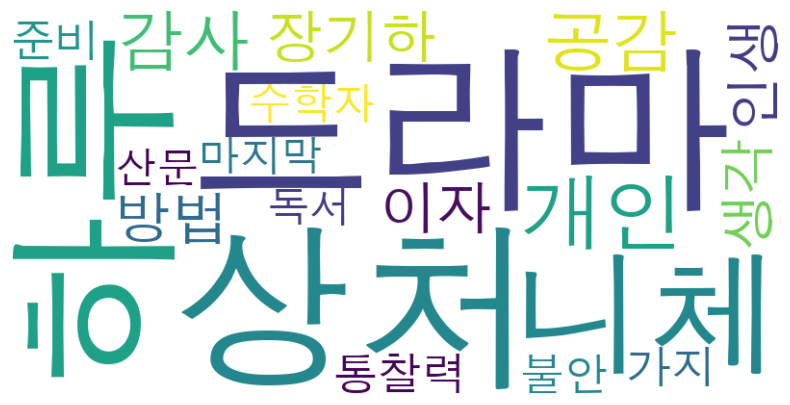

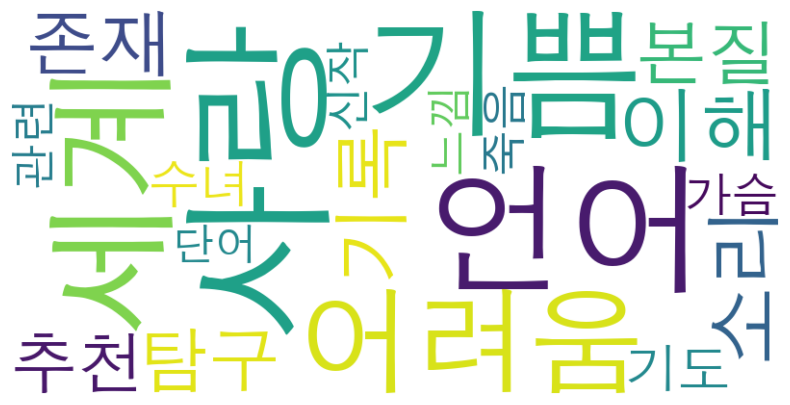

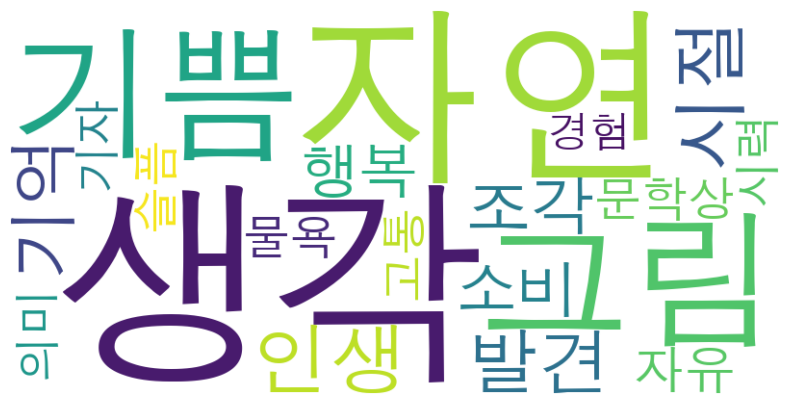

In [386]:
create_wordcloud(lda_model.components_, terms, '기쁨')

In [300]:
doc_topics = lda_model.transform(X)
print(doc_topics.shape)
print(doc_topics[:2])

(80, 3)
[[0.81906602 0.09292554 0.08800844]
 [0.09210631 0.09737702 0.81051667]]


In [301]:
filename_list = happy_df['book_name']
topic_names = ['Topic #' + str(i) for i in range(1,4)]
topic_df = pd.DataFrame(data=doc_topics, columns=topic_names, index=filename_list)
topic_df.head(20)

,Topic #1,Topic #2,Topic #3
book_name,,,
초역 니체의 말,0.819066,0.092926,0.088008
야생의 식탁,0.092106,0.097377,0.810517
일의 기쁨과 슬픔,0.074684,0.076637,0.848679
상실의 기쁨,0.085251,0.088200,0.826549
삶을 견디는 기쁨,0.084760,0.084774,0.830466
초역 니체의 말 2,0.855890,0.073097,0.071013
생에 감사해,0.089083,0.084021,0.826897
기쁨의 천 가지 이름,0.110427,0.110272,0.779301
상관없는 거 아닌가?,0.769374,0.114826,0.115800


In [302]:
topic_modeling_results = topic_df
topic_modeling_results['max'] = topic_modeling_results.idxmax(axis=1)
topic_modeling_results['probability'] = topic_modeling_results[['Topic #1', 'Topic #2', 'Topic #3']].astype(float).max(axis=1)
topic_modeling_results

,Topic #1,Topic #2,Topic #3,max,probability
book_name,,,,,
초역 니체의 말,0.819066,0.092926,0.088008,Topic #1,0.819066
야생의 식탁,0.092106,0.097377,0.810517,Topic #3,0.810517
일의 기쁨과 슬픔,0.074684,0.076637,0.848679,Topic #3,0.848679
상실의 기쁨,0.085251,0.088200,0.826549,Topic #3,0.826549
삶을 견디는 기쁨,0.084760,0.084774,0.830466,Topic #3,0.830466
...,...,...,...,...,...
우리 모두 가끔은 미칠 때가 있지,0.089358,0.816760,0.093882,Topic #2,0.816760
집다운 집,0.106681,0.110781,0.782538,Topic #3,0.782538
호시절,0.070374,0.857215,0.072411,Topic #2,0.857215


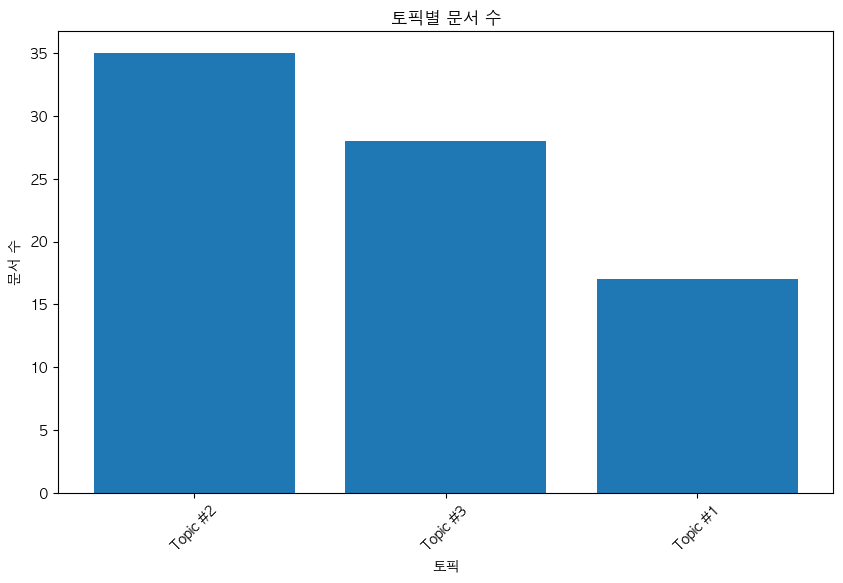

In [303]:
topic_document_counts = topic_modeling_results['max'].value_counts().reset_index()
topic_document_counts.columns = ['토픽', '문서 수']

plt.figure(figsize=(10, 6))
plt.bar(topic_document_counts['토픽'], topic_document_counts['문서 수'])
plt.title('토픽별 문서 수')
plt.xlabel('토픽')
plt.ylabel('문서 수')
plt.xticks(rotation=45)
plt.show()

In [307]:
happy_vis = create_vis(lda_model)
pyLDAvis.save_html(happy_vis, '기쁨_visualization.html')
happy_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.002402 -0.001145       1        1  38.346462
2     -0.002479 -0.001041       2        1  36.263281
0      0.000077  0.002186       3        1  25.390257, topic_info=    Term      Freq     Total Category  logprob  loglift
149  장기하  1.000000  1.000000  Default  30.0000  30.0000
5     감사  1.000000  1.000000  Default  29.0000  29.0000
36    니체  1.000000  1.000000  Default  28.0000  28.0000
186   하루  1.000000  1.000000  Default  27.0000  27.0000
100  수학자  1.000000  1.000000  Default  26.0000  26.0000
..   ...       ...       ...      ...      ...      ...
16    과정  0.363707  1.362123   Topic3  -5.1635   0.0504
83    생각  0.373497  1.495064   Topic3  -5.1369  -0.0162
22    국내  0.353725  1.269292   Topic3  -5.1913   0.0931
177   태도  0.354203  1.294682   Topic3  -5.1900   0.0747
99    수녀  0.355148  1.373169   Topic3  -5.1873   0.0185

[147 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.761152   가슴
2         1  0.731312   가지
4         1  0.821828   감동
6         1  0.766025   감성
7         2  0.751005   개인
...     ...       ...  ...
189       2  0.833534   한편
191       1  0.706261   행복
191       2  0.706261   행복
192       1  0.816268   현대
199       2  0.791623   희망

[85 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [305]:
topic_modeling_results.reset_index(inplace=True)

In [306]:
labeling_happy_df = happy_df
labeling_happy_df['topic'] = topic_modeling_results['max']
labeling_happy_df['probability'] = topic_modeling_results['probability']
labeling_happy_df

,category,book_name,book_explain,author,publisher,publish_date,price,rate,book_imgurl,keywords,book_type,info_text,num_of_page,topic,probability
0,기쁨,초역 니체의 말,3판,"프리드리히 니체 저자(글), 박재현 번역, 시라토리 하루히코 엮음",삼호미디어,2022년 08월 29일,"14,220원",9.70,https://contents.kyobobook.co.kr/sih/fit-in/20...,산문체 삶 시라토리 친구 기술 이전 인간,인문,"세상에 알려지지 않은 니체가 여기에 있다일본 아마존 인문 분야 1위, 해당 분야 역...",276쪽,Topic #1,0.819066
1,기쁨,야생의 식탁,자연이 허락한 사계절의 기쁨을 채집하는 삶,"모 와일드 저자(글), 신소희 번역",부키,2023년 10월 25일,"17,820원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,버섯 해초 초학자 채취 최재천 팬케이크,시/에세이,자연에서는 누구도 가난해지지 않는다생태학자 최재천 · 식물세밀화가 이소영 《숲속의 ...,428쪽,Topic #3,0.810517
2,기쁨,일의 기쁨과 슬픔,장류진 소설집,장류진 저자(글),창비,2019년 10월 25일,"12,600원",9.35,https://contents.kyobobook.co.kr/sih/fit-in/20...,한국현대소설 언니 아주머니 직장생활 거북 직장인,소설,"모두가 기억하게 될 이름, 장류진이 전하는 오늘의 이야기!. 2018년 창비신인소설...",236쪽,Topic #3,0.848679
3,기쁨,상실의 기쁨,흐릿한 어둠 속에서 인생의 빛을 발견하는 태도에 관하여,"프랭크 브루니 저자(글), 홍정인 번역",웅진지식하우스,2023년 03월 17일,"16,200원",9.53,https://contents.kyobobook.co.kr/sih/fit-in/20...,모기지 뇌졸중 뉴욕 타임스 파친코 항암 치료 센트럴 파크,시/에세이,“어느 누구도 상처받지 않은 채 오늘을 살아낼 수는 없다.나는 삶이 나를 얼마나 사...,412쪽,Topic #3,0.826549
4,기쁨,삶을 견디는 기쁨,힘든 시절에 벗에게 보내는 편지,"헤르만 헤세 저자(글), 유혜자 번역",문예춘추사,2022년 12월 01일,"14,400원",9.77,https://contents.kyobobook.co.kr/sih/fit-in/20...,NaN,시/에세이,"밤을 비추는 등대의 불빛 같은 글,〈삶을 견디는 기쁨〉. 고향, 자연, 예술에 대한...",312쪽,Topic #3,0.830466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,기쁨,우리 모두 가끔은 미칠 때가 있지,"관계, 그 잘 지내기 어려움에 대하여",정지음 저자(글),빅피시,2022년 02월 09일,"13,320원",9.53,https://contents.kyobobook.co.kr/sih/fit-in/20...,인간관계 신작 에세이 쌍방 타인 실망 절취선,시/에세이,"서로의 미침을 인정하는 순간 바뀌는 것들-《젊은 ADHD의 슬픔》의 정지음 작가, ...",240쪽,Topic #2,0.816760
76,기쁨,집다운 집,내가 살 집을 선택하는 특별한 기준 (아르테 S 3),"송멜로디 저자(글), 요나 저자(글), 무과수 저자(글), 진명현 저자(글)",아르테(arte),2019년 10월 30일,"9,900원",8.33,https://contents.kyobobook.co.kr/sih/fit-in/20...,위로 온기 건축가 습기 요나 집들이,시/에세이,"“집다운 집이란 무엇일까?” 소유가 아닌 거주하는 기쁨에서 발견한, ‘집’이 가장...",208쪽,Topic #3,0.782538
77,기쁨,호시절,김현 시집 (창비시선 447),김현 저자(글),창비,2020년 08월 10일,"8,100원",8.54,https://contents.kyobobook.co.kr/sih/fit-in/20...,사랑 한국시 김현의 김나영 서정 현대시,시/에세이,“꿈나라에서 들어본 적이 있는 노래를 기다렸어요당신 마음대로 하세요”김현의 독보적인...,236쪽,Topic #2,0.857215
78,기쁨,마음의 평안과 성공을 위한 4가지 신성한 비밀,아름다운 마음의 혁명은 어떻게 오는가,"프리타지 저자(글), 크리슈나지 저자(글), 추미란 번역",김영사,2020년 01월 25일,"14,400원",9.63,https://contents.kyobobook.co.kr/sih/fit-in/20...,사랑 성공 싱크 철학 로니 김보라,인문,"‘괴로운 상태’에 머물겠는가, ‘아름다운 상태’로 살겠는가!전 세계 CEO와 오피니...",256쪽,Topic #2,0.847396


In [308]:
labeling_happy_df.to_csv('기쁨_topic_labeld.csv', index=False)
labeling_happy_df.to_excel('기쁨_topic_labeled.xlsx', index=False)

### 분노

In [387]:
anger_df = pd.read_csv('./data/교보문고_데이터_최종/교보문고_분노_top163.csv')
anger_df['book_type'] = anger_df['book_type'].apply(lambda x: change_category(x))
anger_df = anger_df[anger_df['book_type'] != 'etc']
anger_df.drop('Unnamed: 0', axis=1, inplace=True)
anger_text = anger_df['info_text']
anger_text.head(10)

0     기분을 다스려야 '나'를 다스릴 수 있다!. 부정적인 감정으로 부터 스스로를 보호하...
1     “예민함은 특별한 능력입니다”‘매우 예민함’이라는 화두로 수십 만 독자를 사로잡은 ...
3     인류의 과학기술에 던지는 프랑켄슈타인의 경고!. 인간이 창조한 괴물의 이야기를 그린...
4     “여덟 명의 아이들이 그 밤 집으로 찾아왔다. 우리는 그렇게 가족이 되었다.”교사 ...
6     우울과 분노가 익숙한 시대앞으로 우리는 어떤 삶을 추구해야 하는가. 2020년을 강...
9     데런 브라운의 〈희생〉 〈푸시〉 〈미라클〉 넷플릭스 절찬 스트리밍 중!세계적인 멘탈...
12    코로나 이후 혐오와 분노의 시대를 살아남기 위한 워크북분노의 감정 조절이 힘든 당신...
13    “내 인생에서 가장 큰 영향과 영감을 준 사람!나는 손수현을 보며, 책을 읽고 글을...
15    마음대로 되지 않는 감정 때문에 힘들어 하는 사람들을 치유해 온 스테디셀러 『감정사...
16    분노가 찾아올 때 우리는 그것을 느낀다. 얼굴이 벌게지고 시야가 좁아진다. 온갖 판...
Name: info_text, dtype: object

In [388]:
anger_df.reset_index(drop=True, inplace=True)
anger_df

,category,book_name,book_explain,author,publisher,publish_date,price,rate,book_imgurl,keywords,book_type,info_text,num_of_page
0,분노,기분이 태도가 되지 말자,감정조절이 필요한 당신을 위한 책,김수현 저자(글),하이스트,2022년 11월 25일,"14,400원",9.36,https://contents.kyobobook.co.kr/sih/fit-in/20...,조절 미래 말버릇 콩깍지 기복 윤택,시/에세이,기분을 다스려야 '나'를 다스릴 수 있다!. 부정적인 감정으로 부터 스스로를 보호하...,216쪽
1,분노,매우 예민한 사람들을 위한 상담소,뇌과학과 정신의학을 통해 예민함을 나만의 능력으로,전홍진 저자(글),한겨레출판사,2023년 06월 30일,"18,000원",9.54,https://contents.kyobobook.co.kr/sih/fit-in/20...,우울 치매 뇌과학 트라우마 정신 의학 무기력증,인문,“예민함은 특별한 능력입니다”‘매우 예민함’이라는 화두로 수십 만 독자를 사로잡은 ...,424쪽
2,분노,프랑켄슈타인,(세계문학전집 94),"메리 셸리 저자(글), 김선형 번역",문학동네,2012년 06월 18일,"9,900원",9.86,https://contents.kyobobook.co.kr/sih/fit-in/20...,세계고전문학 창조주 피조물 영국고전 공포 소설 복수,소설,인류의 과학기술에 던지는 프랑켄슈타인의 경고!. 인간이 창조한 괴물의 이야기를 그린...,317쪽
3,분노,선생 박주정과 707명의 아이들,분노는 내려놓고 사랑을 취하라,박주정 저자(글),김영사,2023년 08월 15일,"16,020원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,교단 이해인 폐허 마음속 상처 학교 출연자,시/에세이,“여덟 명의 아이들이 그 밤 집으로 찾아왔다. 우리는 그렇게 가족이 되었다.”교사 ...,336쪽
4,분노,적정한 삶,불안한 시대를 살아가는 우리에게 건네는 인지심리학의 위로와 통찰,김경일 저자(글),진성북스,2021년 03월 30일,"15,300원",9.65,https://contents.kyobobook.co.kr/sih/fit-in/20...,심리학자 만족감 경험 낙관 소시 고정관념,인문,우울과 분노가 익숙한 시대앞으로 우리는 어떤 삶을 추구해야 하는가. 2020년을 강...,360쪽
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,분노,분노의 포도,(프리미엄 클래식 명작),"존 스타인벡 저자(글), 차성준 번역",글로북스,2010년 08월 20일,something is wrong,0.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,NaN,소설,존 스타인벡 장편소설 『분노의 포도』. 미국 문학의 걸작으로 꼽히는 이 소설은 작가...,214쪽
88,분노,사자의 제국 19: 사자의 분노,K. 석우 퓨전판타지 장편소설,K. 석우 저자(글),어울림출판사,2013년 10월 04일,something is wrong,0.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,NaN,소설,K. 석우 퓨전판타지 장편소설 『사자의 제국』 제19권 《사자의 분노》편. 사신이라...,296쪽
89,분노,운명과 분노,로런 그로프 장편소설,"로런 그로프 저자(글), 정연희 번역",문학동네,2017년 04월 05일,"16,650원",9.24,https://contents.kyobobook.co.kr/sih/fit-in/20...,사랑 장편소설 소설 곳곳 미국소설 결혼 생활 결혼,소설,‘결혼’이라는 이름으로 묶인 두 사람이 간직한 비밀과 진실!. 버락 오바마 전 미국...,608쪽
90,분노,분노의 시대,현재의 역사,"판카지 미슈라 저자(글), 강주헌 번역",열린책들,2018년 06월 15일,something is wrong,9.67,https://contents.kyobobook.co.kr/sih/fit-in/20...,NaN,인문,아무런 의구심 없이 받아들여 왔던 진보의 역사를 전혀 다른 시각으로 바라보다!. 오...,464쪽


In [389]:
# 기본 전처리: 기호/숫자 제거

def preprocess_text(text):
    text = re.sub(r'[.,!?]', '', text)
    text = re.sub(r'["“”()]+', '', text)
    text = re.sub(r'[\u300a\u300b\u3008\u3009]', '', text)
    text = re.sub(r'\d', '', text)
    text = text.replace("‘", "").replace("’", "").replace('『','').replace('』','')
    return text

cleaned_text = [preprocess_text(text) for text in anger_text]
cleaned_text[0]

"기분을 다스려야 '나'를 다스릴 수 있다 부정적인 감정으로 부터 스스로를 보호하고 긍정적인 감정을 끌어올려 평온한 심리 상태를 유지하는 비결 인생을 결정하는 건 바로 하루의 기분이다 그날의 기분이 하루의 성과를 결정하고하루의 성과들이 모여 미래를 만들고그 미래들이 곧 내 인생이 되기 때문이다 감정을 조절하면 미래가 바뀐다인생을 결정하는 건 바로 하루의 기분이다 그날의 기분이 하루의 성과를 결정하고 하루의 성과들이 모여 미래를 만들고 그 미래들이 곧 내 인생이 되기 때문이다 감정을 조절하면 미래가 바뀐다 이 책을 통해 자신의 감정을 현명하게 통제하는 방법을 배우고 인생을 바꾸는 계기가 되기를 바란다"

In [390]:
# 토큰화
tokenized_text = [komoran.nouns(row) for row in cleaned_text]
print(' '.join(tokenized_text[0]))
print('tokenized_text cnt: ' + str(len(tokenized_text[0])))

기분 수 부정 감정 스스로 보호 긍정 감정 평온 심리 상태 유지 비결 인생 결정 건 하루 기분 그날 기분 하루 성과 결정 하루 성과 미래 미래 인생 때문 감정 조절 미래 다인 결정 건 하루 기분 그날 기분 하루 성과 결정 하루 성과 미래 미래 인생 때문 감정 조절 미래 책 자신 감정 현명 통제 방법 인생 계기
tokenized_text cnt: 59


In [391]:
# 불용어 제거 1: 불용어 사전 활용
f = open('./preprocessing/stopwords-ko.txt', 'r')
lines = f.readlines()
stopwords = []
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()

dic_filtered_text = []

for text in tokenized_text:
    filtered_list = [token for token in text if token not in stopwords]
    dic_filtered_text.append(filtered_list)

print(' '.join(dic_filtered_text[0]))
print('filtered_text cnt: ' + str(len(dic_filtered_text[0])))



기분 수 부정 스스로 보호 긍정 평온 심리 상태 유지 비결 인생 결정 건 하루 기분 기분 하루 성과 결정 하루 성과 미래 미래 인생 때문 조절 미래 다인 결정 건 하루 기분 기분 하루 성과 결정 하루 성과 미래 미래 인생 때문 조절 미래 책 현명 통제 방법 인생 계기
filtered_text cnt: 51


In [392]:
# 불용어 제거 2: 한글자 제거

one_filtered_text = []

for text in dic_filtered_text:
    filtered_list = [token for token in text if len(token) != 1]
    one_filtered_text.append(filtered_list)

print(' '.join(one_filtered_text[0]))
print('one_filtered_text cnt: ' + str(len(one_filtered_text[0])))

기분 부정 스스로 보호 긍정 평온 심리 상태 유지 비결 인생 결정 하루 기분 기분 하루 성과 결정 하루 성과 미래 미래 인생 때문 조절 미래 다인 결정 하루 기분 기분 하루 성과 결정 하루 성과 미래 미래 인생 때문 조절 미래 현명 통제 방법 인생 계기
one_filtered_text cnt: 47


In [393]:
# 토큰화된 파일 역토큰화
# TfidVectorizer는 토큰화되어있지 않은 텍스트 데이터를 입력으로 사용하기 때문

detokenized_doc = []
for i in range(len(one_filtered_text)):
    t = ' '.join(one_filtered_text[i])
    detokenized_doc.append(t)

In [394]:
# TF-IDF 행렬 변환
vectorizer = TfidfVectorizer(max_features= 200)
X = vectorizer.fit_transform(detokenized_doc)

print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (92, 200)


In [395]:
# 최적의 토픽 수 결정하기
# perplexity

for num_topics in range(3, 10):  # 토픽 수 범위 설정
    lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online',random_state=777,max_iter=1)
    lda.fit(X)
    perplexity = lda.perplexity(X)

    print(f"토픽 {num_topics}개: {perplexity}")

토픽 3개: 924.9510972434612
토픽 4개: 1840.8965200699658
토픽 5개: 4142.7998175696575
토픽 6개: 9771.33133284336
토픽 7개: 25303.451599814824
토픽 8개: 71865.75722431572
토픽 9개: 215577.57573461212


In [396]:
lda_model = LatentDirichletAllocation(n_components=3,learning_method='online',random_state=777,max_iter=1)
lda_top = lda_model.fit_transform(X)

print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.92956765 0.87556206 1.01159794 1.21914653 0.83199731 1.3806433
  1.01700842 1.08007195 1.00389895 0.84154616 1.06401849 1.0165968
  0.97066055 0.84070327 1.20963076 1.09994264 1.16346539 0.94532116
  1.35291533 0.75724063 0.9632646  0.96779885 1.06495239 0.90612268
  0.79053156 0.78608573 1.09656912 0.9719491  0.75890483 0.90164307
  0.98306911 0.92899757 0.91021441 1.0320347  1.00406824 0.85441607
  1.01945027 0.96715129 0.90818911 0.92607257 1.19024443 1.04562828
  0.93001353 0.85368396 0.96421903 1.15307662 1.04953494 1.19523465
  1.00603897 0.87942379 1.00258197 0.76371902 0.89774567 0.92321288
  1.06927241 1.16706226 0.91918187 0.93113164 0.94380556 0.94133977
  0.95693971 0.8516881  1.14444896 2.16549027 1.16669242 1.09749138
  1.10701593 1.15921981 1.10370536 1.03124749 0.98593569 0.72721935
  1.25571106 0.83580061 0.85529232 0.98865929 1.12855562 0.9181516
  0.91212421 1.2592131  1.21857337 0.84374031 1.21693474 0.94372335
  0.84450279 0.87247701 1.13893607 1.15256111 0.986

In [397]:
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms,15)

Topic 1: [('분노', 2.17), ('인간', 1.46), ('걸작', 1.38), ('괴물', 1.35), ('출간', 1.27), ('생각', 1.26), ('사회', 1.26), ('갈등', 1.22), ('생명', 1.22), ('선정', 1.22), ('과정', 1.21), ('포크너', 1.21), ('문제', 1.2), ('때문', 1.19), ('조절', 1.17)]
Topic 2: [('분노', 1.57), ('가족', 1.34), ('기분', 1.29), ('방법', 1.29), ('행복', 1.28), ('앵거', 1.28), ('여성', 1.26), ('철학', 1.25), ('치료', 1.19), ('상담', 1.19), ('불안', 1.19), ('문제', 1.18), ('인간', 1.17), ('지배', 1.17), ('조절', 1.17)]
Topic 3: [('분노', 2.0), ('변화', 1.35), ('장애', 1.33), ('제시', 1.28), ('나침반', 1.27), ('심리학', 1.25), ('장편소설', 1.23), ('내면', 1.21), ('폭발', 1.21), ('여성', 1.21), ('상황', 1.19), ('대처', 1.17), ('문제', 1.17), ('열정', 1.16), ('정신', 1.16)]


/usr/local/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


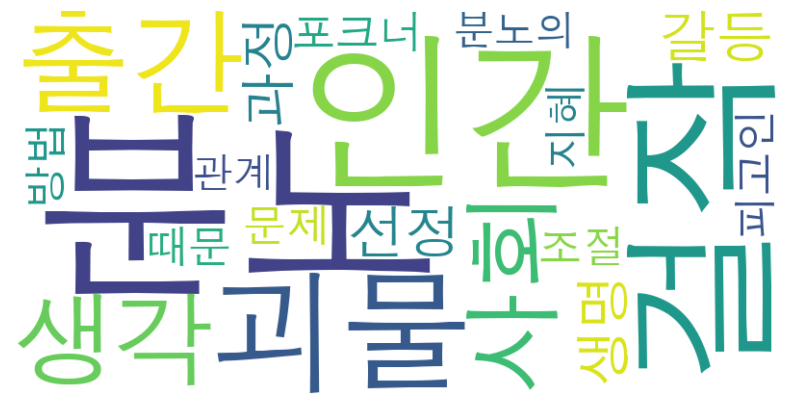

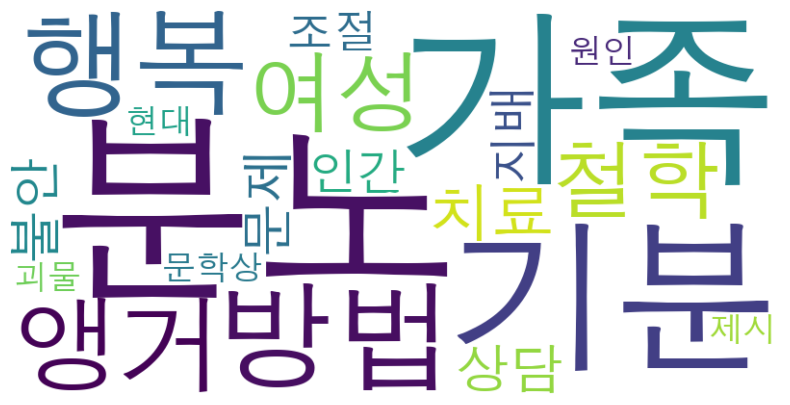

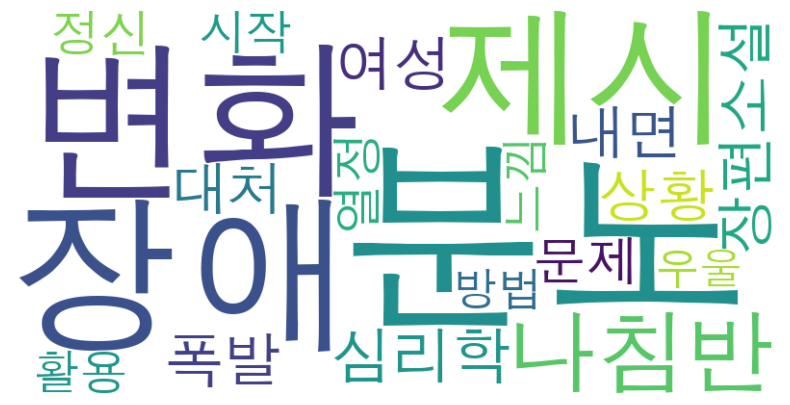

In [398]:
create_wordcloud(lda_model.components_, terms, '분노')

In [322]:
doc_topics = lda_model.transform(X)
print(doc_topics.shape)
print(doc_topics[:2])

(92, 3)
[[0.10353879 0.78764148 0.10881974]
 [0.07234715 0.8561392  0.07151365]]


In [329]:
filename_list = anger_df['book_name']
topic_names = ['Topic #' + str(i) for i in range(1,4)]
topic_df = pd.DataFrame(data=doc_topics, columns=topic_names, index=filename_list)
topic_df.head(20)

,Topic #1,Topic #2,Topic #3
book_name,,,
기분이 태도가 되지 말자,0.103539,0.787641,0.108820
매우 예민한 사람들을 위한 상담소,0.072347,0.856139,0.071514
프랑켄슈타인,0.832238,0.086019,0.081744
선생 박주정과 707명의 아이들,0.121436,0.123475,0.755089
적정한 삶,0.083662,0.834661,0.081677
모든 것이 괜찮아지는 기술,0.081525,0.836384,0.082091
분노를 다스리는 인지행동 워크북,0.114745,0.111717,0.773538
악인론,0.079640,0.081851,0.838509
감정사용설명서(10주년 기념 양장 한정 에디션),0.751299,0.127979,0.120722


In [330]:
topic_modeling_results = topic_df
topic_modeling_results['max'] = topic_modeling_results.idxmax(axis=1)
topic_modeling_results['probability'] = topic_modeling_results[['Topic #1', 'Topic #2', 'Topic #3']].astype(float).max(axis=1)
topic_modeling_results

,Topic #1,Topic #2,Topic #3,max,probability
book_name,,,,,
기분이 태도가 되지 말자,0.103539,0.787641,0.108820,Topic #2,0.787641
매우 예민한 사람들을 위한 상담소,0.072347,0.856139,0.071514,Topic #2,0.856139
프랑켄슈타인,0.832238,0.086019,0.081744,Topic #1,0.832238
선생 박주정과 707명의 아이들,0.121436,0.123475,0.755089,Topic #3,0.755089
적정한 삶,0.083662,0.834661,0.081677,Topic #2,0.834661
...,...,...,...,...,...
분노의 포도,0.816502,0.092401,0.091098,Topic #1,0.816502
사자의 제국 19: 사자의 분노,0.129193,0.117221,0.753586,Topic #3,0.753586
운명과 분노,0.812496,0.091082,0.096422,Topic #1,0.812496


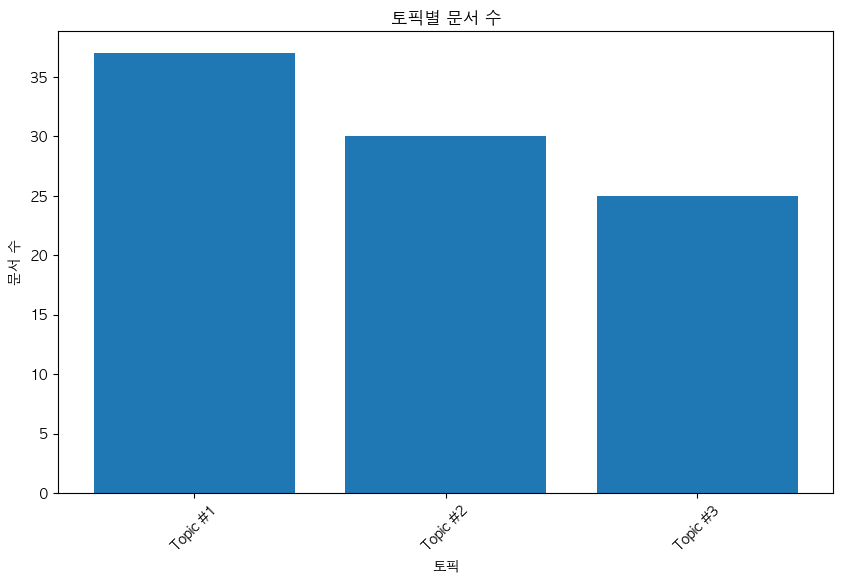

In [331]:
topic_document_counts = topic_modeling_results['max'].value_counts().reset_index()
topic_document_counts.columns = ['토픽', '문서 수']

plt.figure(figsize=(10, 6))
plt.bar(topic_document_counts['토픽'], topic_document_counts['문서 수'])
plt.title('토픽별 문서 수')
plt.xlabel('토픽')
plt.ylabel('문서 수')
plt.xticks(rotation=45)
plt.show()

In [335]:
anger_vis = create_vis(lda_model)
pyLDAvis.save_html(anger_vis, '분노_visualization.html')
anger_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.002094  0.001468       1        1  39.428451
1      0.000292 -0.002456       2        1  32.874815
2     -0.002385  0.000988       3        1  27.696734, topic_info=    Term      Freq     Total Category  logprob  loglift
61    변화  1.000000  1.000000  Default  30.0000  30.0000
29   나침반  1.000000  1.000000  Default  29.0000  29.0000
30    내면  1.000000  1.000000  Default  28.0000  28.0000
146   장애  1.000000  1.000000  Default  27.0000  27.0000
107  심리학  1.000000  1.000000  Default  26.0000  26.0000
..   ...       ...       ...      ...      ...      ...
191   행동  0.465843  1.495442   Topic3  -5.1636   0.1175
131   우울  0.482403  1.652567   Topic3  -5.1287   0.0525
47    문제  0.499991  1.787491   Topic3  -5.0929   0.0099
40    때문  0.474844  1.665433   Topic3  -5.1445   0.0290
55    방법  0.482705  1.808317   Topic3  -5.1281  -0.0369

[153 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.612983   가족
0         2  0.612983   가족
1         1  0.661504   가지
1         2  0.661504   가지
3         1  0.654132   갈등
...     ...       ...  ...
194       2  0.656040   현실
195       1  0.708583   현재
195       2  0.708583   현재
197       1  0.656812   활용
198       1  0.693543   회피

[146 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [333]:
topic_modeling_results.reset_index(inplace=True)
topic_modeling_results

,book_name,Topic #1,Topic #2,Topic #3,max,probability
0,기분이 태도가 되지 말자,0.103539,0.787641,0.108820,Topic #2,0.787641
1,매우 예민한 사람들을 위한 상담소,0.072347,0.856139,0.071514,Topic #2,0.856139
2,프랑켄슈타인,0.832238,0.086019,0.081744,Topic #1,0.832238
3,선생 박주정과 707명의 아이들,0.121436,0.123475,0.755089,Topic #3,0.755089
4,적정한 삶,0.083662,0.834661,0.081677,Topic #2,0.834661
...,...,...,...,...,...,...
87,분노의 포도,0.816502,0.092401,0.091098,Topic #1,0.816502
88,사자의 제국 19: 사자의 분노,0.129193,0.117221,0.753586,Topic #3,0.753586
89,운명과 분노,0.812496,0.091082,0.096422,Topic #1,0.812496
90,분노의 시대,0.827417,0.086744,0.085839,Topic #1,0.827417


In [334]:
labeling_anger_df = anger_df
labeling_anger_df['topic'] = topic_modeling_results['max']
labeling_anger_df['probability'] = topic_modeling_results['probability']
labeling_anger_df

,category,book_name,book_explain,author,publisher,publish_date,price,rate,book_imgurl,keywords,book_type,info_text,num_of_page,topic,probability
0,분노,기분이 태도가 되지 말자,감정조절이 필요한 당신을 위한 책,김수현 저자(글),하이스트,2022년 11월 25일,"14,400원",9.36,https://contents.kyobobook.co.kr/sih/fit-in/20...,조절 미래 말버릇 콩깍지 기복 윤택,시/에세이,기분을 다스려야 '나'를 다스릴 수 있다!. 부정적인 감정으로 부터 스스로를 보호하...,216쪽,Topic #2,0.787641
1,분노,매우 예민한 사람들을 위한 상담소,뇌과학과 정신의학을 통해 예민함을 나만의 능력으로,전홍진 저자(글),한겨레출판사,2023년 06월 30일,"18,000원",9.54,https://contents.kyobobook.co.kr/sih/fit-in/20...,우울 치매 뇌과학 트라우마 정신 의학 무기력증,인문,“예민함은 특별한 능력입니다”‘매우 예민함’이라는 화두로 수십 만 독자를 사로잡은 ...,424쪽,Topic #2,0.856139
2,분노,프랑켄슈타인,(세계문학전집 94),"메리 셸리 저자(글), 김선형 번역",문학동네,2012년 06월 18일,"9,900원",9.86,https://contents.kyobobook.co.kr/sih/fit-in/20...,세계고전문학 창조주 피조물 영국고전 공포 소설 복수,소설,인류의 과학기술에 던지는 프랑켄슈타인의 경고!. 인간이 창조한 괴물의 이야기를 그린...,317쪽,Topic #1,0.832238
3,분노,선생 박주정과 707명의 아이들,분노는 내려놓고 사랑을 취하라,박주정 저자(글),김영사,2023년 08월 15일,"16,020원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,교단 이해인 폐허 마음속 상처 학교 출연자,시/에세이,“여덟 명의 아이들이 그 밤 집으로 찾아왔다. 우리는 그렇게 가족이 되었다.”교사 ...,336쪽,Topic #3,0.755089
4,분노,적정한 삶,불안한 시대를 살아가는 우리에게 건네는 인지심리학의 위로와 통찰,김경일 저자(글),진성북스,2021년 03월 30일,"15,300원",9.65,https://contents.kyobobook.co.kr/sih/fit-in/20...,심리학자 만족감 경험 낙관 소시 고정관념,인문,우울과 분노가 익숙한 시대앞으로 우리는 어떤 삶을 추구해야 하는가. 2020년을 강...,360쪽,Topic #2,0.834661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,분노,분노의 포도,(프리미엄 클래식 명작),"존 스타인벡 저자(글), 차성준 번역",글로북스,2010년 08월 20일,something is wrong,0.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,NaN,소설,존 스타인벡 장편소설 『분노의 포도』. 미국 문학의 걸작으로 꼽히는 이 소설은 작가...,214쪽,Topic #1,0.816502
88,분노,사자의 제국 19: 사자의 분노,K. 석우 퓨전판타지 장편소설,K. 석우 저자(글),어울림출판사,2013년 10월 04일,something is wrong,0.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,NaN,소설,K. 석우 퓨전판타지 장편소설 『사자의 제국』 제19권 《사자의 분노》편. 사신이라...,296쪽,Topic #3,0.753586
89,분노,운명과 분노,로런 그로프 장편소설,"로런 그로프 저자(글), 정연희 번역",문학동네,2017년 04월 05일,"16,650원",9.24,https://contents.kyobobook.co.kr/sih/fit-in/20...,사랑 장편소설 소설 곳곳 미국소설 결혼 생활 결혼,소설,‘결혼’이라는 이름으로 묶인 두 사람이 간직한 비밀과 진실!. 버락 오바마 전 미국...,608쪽,Topic #1,0.812496
90,분노,분노의 시대,현재의 역사,"판카지 미슈라 저자(글), 강주헌 번역",열린책들,2018년 06월 15일,something is wrong,9.67,https://contents.kyobobook.co.kr/sih/fit-in/20...,NaN,인문,아무런 의구심 없이 받아들여 왔던 진보의 역사를 전혀 다른 시각으로 바라보다!. 오...,464쪽,Topic #1,0.827417


In [337]:
labeling_anger_df.to_csv('분노_topic_labeled.csv', index=False)
labeling_anger_df.to_excel('분노_topic_labeled.xlsx', index=False)

### 불안

In [399]:
insecure_df = pd.read_csv('./data/교보문고_데이터_최종/교보문고_불안_top193.csv')
insecure_df['book_type'] = insecure_df['book_type'].apply(lambda x: change_category(x))
insecure_df = insecure_df[insecure_df['book_type'] != 'etc']
insecure_df.drop('Unnamed: 0', axis=1, inplace=True)
insecure_text = insecure_df['info_text']
insecure_text.head(10)

0     알랭 드 보통 《불안》 40만부 판매 기념 특별 리커버판 출간!배우 장동건, 방송인...
1     청춘의 한 시기를 통과 의례처럼 거쳐야 하는 일본 데카당스 문학의 대표작. 오직 순...
2     모든 일에 의심 많고 의문 넘치고 예민한 사람들을 위한 심리 처방. “생각이 너무 ...
4     “어디로 가는지 그 목적지를 미리 볼 필요는 없다.  그저 자신 앞에 놓인 1미터만...
5     왜 모든 것은 관리하면서 영혼만은 방치하는가?. 내면의 자유를 위한 놓아 보내기 연...
6     때 이른 성공을 버리고 떠난 17년간의 숲속 수행, 그리고 삶과 죽음의 경계에서 깨...
7     “《필링 굿》보다 10배는 더 놀라운 책!”40년의 연구와 40,000시간의 치료 ...
8     연애만 하면 ‘을’이 되는 이들에게애착 유형 심리학이 건네는 마음 처방《혼자 잘해주...
9     “나는 왜 나쁜 생각에 더 자주 빠져들까?”우울한 뇌를 행복한 뇌로 바꾸는 7단계 ...
11    “왜 불안한 마음은 빈틈없는 논리와 설득만으로는 해결되지 않을까?”35년간의 불안장...
Name: info_text, dtype: object

In [400]:
insecure_df.reset_index(drop=True, inplace=True)
insecure_df

,category,book_name,book_explain,author,publisher,publish_date,price,rate,book_imgurl,keywords,book_type,info_text,num_of_page
0,불안,불안,40만부 판매 기념 교보문고 단독 리커버,"알랭 드 보통 저자(글), 정영목 번역",은행나무,2012년 01월 04일,"13,500원",9.54,https://contents.kyobobook.co.kr/sih/fit-in/20...,김제동 불안감 천문학자 철학서 방송인 배우,시/에세이,"알랭 드 보통 《불안》 40만부 판매 기념 특별 리커버판 출간!배우 장동건, 방송인...",368쪽
1,불안,인간 실격,(세계문학전집 103),"다자이 오사무 저자(글), 김춘미 번역",민음사,2012년 04월 10일,"8,100원",9.42,https://contents.kyobobook.co.kr/sih/fit-in/20...,세계고전문학 일본소설 직소 데카당스 작가 연보 자전적소설,소설,청춘의 한 시기를 통과 의례처럼 거쳐야 하는 일본 데카당스 문학의 대표작. 오직 순...,192쪽
2,불안,나는 생각이 너무 많아(춘배 에디션),No book_explain exists,"크리스텔 프티콜랭 저자(글), 이세진 번역",부키,2023년 09월 20일,"16,200원",9.77,https://contents.kyobobook.co.kr/sih/fit-in/20...,심리 매사 보통 사람 임상 경험 과잉 경학,인문,모든 일에 의심 많고 의문 넘치고 예민한 사람들을 위한 심리 처방. “생각이 너무 ...,316쪽
3,불안,오늘도 망설이다 하루가 다 갔다,No book_explain exists,"샐리 M. 윈스턴 저자(글), 마틴 N. 세이프 저자(글), 박이봄 번역",심심,2023년 06월 23일,"16,920원",9.85,https://contents.kyobobook.co.kr/sih/fit-in/20...,뇌과학 불안 망설임 심리학 이론 만성 예기,인문,“어디로 가는지 그 목적지를 미리 볼 필요는 없다. 그저 자신 앞에 놓인 1미터만...,340쪽
4,불안,상처 받지 않는 영혼,내면의 자유를 위한 놓아 보내기 연습,"마이클 A. 싱어 저자(글), 이균형 번역, 성해영 감수",라이팅하우스,2014년 05월 08일,"13,500원",9.62,https://contents.kyobobook.co.kr/sih/fit-in/20...,심리치료 도덕경 불안 노자 상처 프로이트,인문,왜 모든 것은 관리하면서 영혼만은 방치하는가?. 내면의 자유를 위한 놓아 보내기 연...,301쪽
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,불안,불안한 행복,김미원 수필집 삶은 불안을 기억하며 행복해진다,김미원 저자(글),특별한서재,2021년 02월 25일,"12,600원",9.13,https://contents.kyobobook.co.kr/sih/fit-in/20...,감정 버지니아 울프 일상 행복 동거인 남루,시/에세이,몸으로 치열하게 써 내려간 불안한 행복의 기록!삶은 불안을 기억하며 행복해진다-깨질...,244쪽
141,불안,나는 왜 불안한 사랑을 하는가,아가서에 나타난 사랑론,권요셉 저자(글),뜰힘,2023년 08월 31일,"15,300원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,아가서 구약 성서 솔로몬 히스테리 주요 주제 애착,인문,"“이 책은 진정한 사랑에 관한 이야기다.”. 사랑은 인간의 삶, 그 자체다. 우리는...",268쪽
142,불안,불안이 불안하다면,No book_explain exists,"트레이시 데니스 티와리 저자(글), 양소하 번역",와이즈베리,2023년 04월 28일,"15,300원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,심리학자 추진력 저자 본인 원시인 박차 박동,인문,“불안에 대한 기존의 오해를 깨부쉈다”“평소보다 더 불안한 당신이 꼭 읽어야 할 책...,264쪽
143,불안,21가지 발표불안 극복 시크릿,당당한 삶을 위한,강은영 저자(글),더로드,2022년 07월 19일,"13,500원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,상처치유,자기계발,발표불안으로 힘들어하는 사람들의 고민을 한방에 해결해 주는 책!!발표가 두려움이 아...,216쪽


In [401]:
# 기본 전처리: 기호/숫자 제거

def preprocess_text(text):
    text = re.sub(r'[.,!?]', '', text)
    text = re.sub(r'["“”()]+', '', text)
    text = re.sub(r'[\u300a\u300b\u3008\u3009]', '', text)
    text = re.sub(r'\d', '', text)
    text = text.replace("‘", "").replace("’", "").replace('『','').replace('』','')
    return text

cleaned_text = [preprocess_text(text) for text in insecure_text]
cleaned_text[0]

'알랭 드 보통 불안 만부 판매 기념 특별 리커버판 출간배우 장동건 방송인 김제동 천문학자 심재경 추천여년 간 한국에서 꾸준히 사랑받아온 스테디셀러 마크 로스코 작품 No / No   표지로 새롭게 만난다 우리나라 독자들이 가장 사랑하는 작가 중 한 명인 알랭 드 보통의 인문철학 에세이 불안이 국내 판매 만부를 기념해 교보문고 특별 리커버판으로 새롭게 선보인다 년 한국어 초판 출간 이래 여년 가까이 꾸준히 사랑받아온 이 책은 현대인의 욕망과 불안 심리에 대한 첨예하고 날카로운 통찰력과 해법을 담아 배우 장동건 방송인 김제동 천문학자 심재경 등 유명인과 지식인들이 추천하는 필독서로 잘 알려져 왔다 특별히 이번 리커버판에는 러시아 출신의 미국 화가 마크 로스코Mark Rothko의 추상화 작품 No  / No  를 표지에 사용해 현대인의 미묘하고 불안한 심리를 전면에 드러내는 데 포인트를 두었다 강렬한 색상이 불러일으키는 다양한 감정들을 통해 독자들이 저마다의 방식으로 불안이라는 인문학적 테마를 자유롭게 해석하고 사유하도록 이끌었다 또한 작가의 친필 메시지를 인쇄본으로 함께 수록해 특별판으로서 소장 가치를 높였다 이번 특별판은 교보문고 온·오프라인에서만 한정 기간동안 만날 수 있다'

In [402]:
# 토큰화
tokenized_text = [komoran.nouns(row) for row in cleaned_text]
print(' '.join(tokenized_text[0]))
print('tokenized_text cnt: ' + str(len(tokenized_text[0])))

알랭 드 보통 불안 부 판매 기념 리 커버 판 출간 배우 장동건 방송 김제동 천문학자 심 재경 추천 년 간 한국 사랑 마크 로스코 작품 표지 우리나라 독자 사랑 작가 중 명 알랭 드 보통 인문 철학 에세이 불안 국내 판매 부 기념 교보문고 리 커버 판 년 한국어 초판 출간 여 년 사랑 책 현대인 욕망 불안 심리 통찰력 해법 배우 장동건 방송 김제동 천문학자 심 재경 등 유명인 지식인 추천 필독서 이번 리 커버 판 러시아 출신 미국 화가 마크 로스코 추상화 작품 표지 사용 현대인 불안 심리 전면 데 포인트 색상 감정 독자 방식 불안 인문학 테마 자유 해석 사유 작가 친필 메시지 인쇄 본 수록 판 소장 가치 이번 판 교보문고 오프라인 한정 기간 동안 수
tokenized_text cnt: 115


In [403]:
# 불용어 제거 1: 불용어 사전 활용
f = open('./preprocessing/stopwords-ko.txt', 'r')
lines = f.readlines()
stopwords = []
for line in lines:
    line = line.replace('\n', '')
    stopwords.append(line)
f.close()

dic_filtered_text = []

for text in tokenized_text:
    filtered_list = [token for token in text if token not in stopwords]
    dic_filtered_text.append(filtered_list)

print(' '.join(dic_filtered_text[0]))
print('filtered_text cnt: ' + str(len(dic_filtered_text[0])))



알랭 드 보통 불안 부 판매 기념 리 커버 판 출간 장동건 방송 김제동 천문학자 심 재경 추천 간 한국 사랑 마크 로스코 표지 우리나라 사랑 중 명 알랭 드 보통 인문 철학 불안 국내 판매 부 기념 교보문고 리 커버 판 한국어 초판 출간 사랑 책 현대인 욕망 불안 심리 통찰력 해법 장동건 방송 김제동 천문학자 심 재경 유명인 지식인 추천 필독서 리 커버 판 러시아 출신 미국 화가 마크 로스코 추상화 표지 사용 현대인 불안 심리 전면 데 포인트 색상 방식 불안 인문학 테마 자유 해석 사유 친필 메시지 인쇄 본 판 소장 가치 판 교보문고 오프라인 한정 기간 수
filtered_text cnt: 96


In [404]:
# 불용어 제거 2: 한글자 제거

one_filtered_text = []

for text in dic_filtered_text:
    filtered_list = [token for token in text if len(token) != 1]
    one_filtered_text.append(filtered_list)

print(' '.join(one_filtered_text[0]))
print('one_filtered_text cnt: ' + str(len(one_filtered_text[0])))

알랭 드 보통 불안 판매 기념 커버 출간 장동건 방송 김제동 천문학자 재경 추천 한국 사랑 마크 로스코 표지 우리나라 사랑 알랭 드 보통 인문 철학 불안 국내 판매 기념 교보문고 커버 한국어 초판 출간 사랑 현대인 욕망 불안 심리 통찰력 해법 장동건 방송 김제동 천문학자 재경 유명인 지식인 추천 필독서 커버 러시아 출신 미국 화가 마크 로스코 추상화 표지 사용 현대인 불안 심리 전면 포인트 색상 방식 불안 인문학 테마 자유 해석 사유 친필 메시지 인쇄 소장 가치 교보문고 오프라인 한정 기간
one_filtered_text cnt: 77


In [405]:
# 토큰화된 파일 역토큰화
# TfidVectorizer는 토큰화되어있지 않은 텍스트 데이터를 입력으로 사용하기 때문

detokenized_doc = []
for i in range(len(one_filtered_text)):
    t = ' '.join(one_filtered_text[i])
    detokenized_doc.append(t)

In [406]:
# TF-IDF 행렬 변환
vectorizer = TfidfVectorizer(max_features= 200)
X = vectorizer.fit_transform(detokenized_doc)

print('TF-IDF 행렬의 크기 :',X.shape)

TF-IDF 행렬의 크기 : (145, 200)


In [407]:
# 최적의 토픽 수 결정하기
# perplexity

for num_topics in range(2, 10):  # 토픽 수 범위 설정
    lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online',random_state=777,max_iter=1)
    lda.fit(X)
    perplexity = lda.perplexity(X)

    print(f"토픽 {num_topics}개: {perplexity}")

토픽 2개: 409.06592450942503
토픽 3개: 650.1350351339494
토픽 4개: 1022.3923715322481
토픽 5개: 1664.865131249822
토픽 6개: 2818.5685193406252
토픽 7개: 4839.656730384326
토픽 8개: 8361.074186322616
토픽 9개: 16107.037252309556


In [408]:
lda_model = LatentDirichletAllocation(n_components=3,learning_method='online',random_state=777,max_iter=1)
lda_top = lda_model.fit_transform(X)

print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.75093467 1.17699444 1.37862974 1.02477261 0.85537927 1.10616499
  0.86181105 1.90715836 0.98874448 1.04813074 1.72228655 0.9940572
  0.8188032  1.01427599 1.55468407 0.94654185 1.99715005 0.88622985
  1.02627088 0.80711807 1.18082176 0.88460166 1.10451431 0.80768547
  0.72116238 0.751244   0.96439243 0.79179218 1.61398298 0.85488979
  1.05126076 0.80863376 1.047461   0.96535021 0.98512519 0.83708692
  1.12308504 1.22671582 0.86307908 0.7568222  1.07876061 0.92496975
  0.9762404  1.00169604 0.91013456 1.05902774 1.06905106 1.1396614
  0.92089558 0.91604347 0.85790196 0.74858937 1.5795069  0.97694594
  2.08252006 1.4433216  1.15553646 0.87988724 0.82329313 0.78732134
  1.1518838  0.79574026 1.14809316 7.321683   1.10552782 0.89858027
  1.10126477 1.52458328 0.89279345 0.86073068 0.97783464 1.06783081
  1.23235131 0.9445255  0.90003358 1.57112901 1.86472591 0.89235198
  1.03118149 0.94509281 1.72426156 1.1233003  0.91950038 1.78576387
  0.87873461 0.88640346 1.76087444 1.2772165  1.06

In [409]:
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms,15)

Topic 1: [('불안', 7.32), ('장애', 3.41), ('발표', 2.08), ('평화', 2.06), ('공황', 2.0), ('걱정', 1.91), ('생각', 1.86), ('치료', 1.83), ('정도', 1.8), ('세상', 1.79), ('순간', 1.76), ('성장', 1.72), ('경험', 1.72), ('극복', 1.61), ('반복', 1.58)]
Topic 2: [('사랑', 3.83), ('철학', 2.41), ('두려움', 2.34), ('이유', 2.01), ('관계', 1.87), ('그림', 1.87), ('현실', 1.86), ('존재', 1.83), ('불안', 1.8), ('인생', 1.79), ('표현', 1.73), ('상처', 1.73), ('생각', 1.71), ('세상', 1.69), ('인간', 1.61)]
Topic 3: [('불안', 3.31), ('행복', 2.21), ('시작', 1.94), ('생각', 1.58), ('인간', 1.53), ('오늘', 1.52), ('사회', 1.52), ('세상', 1.39), ('위로', 1.39), ('세계', 1.32), ('카프카', 1.31), ('구성', 1.27), ('정신', 1.24), ('기록', 1.22), ('근거', 1.2)]


/usr/local/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


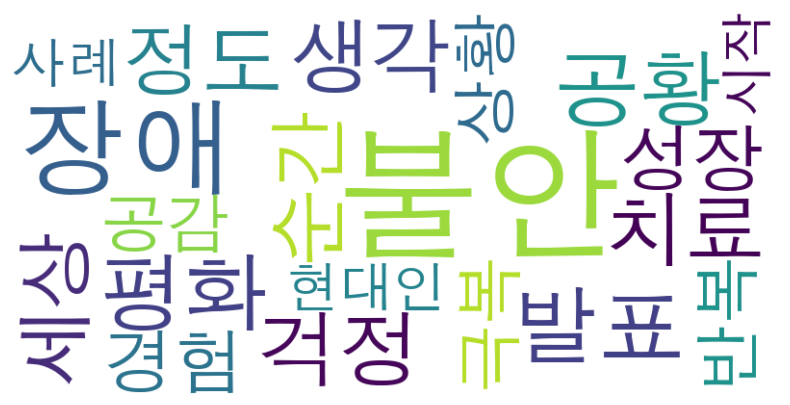

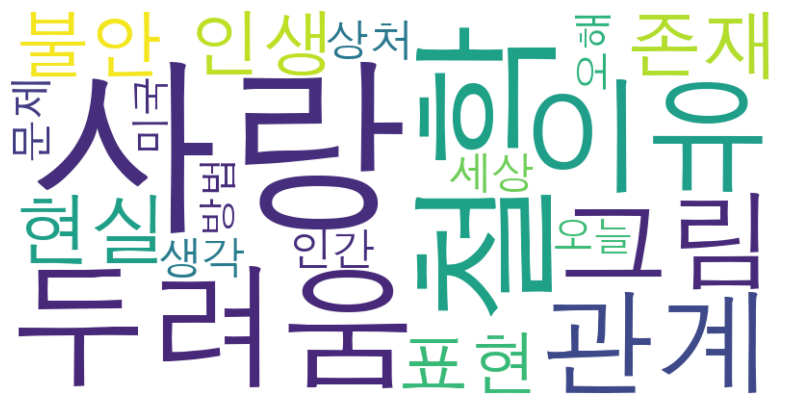

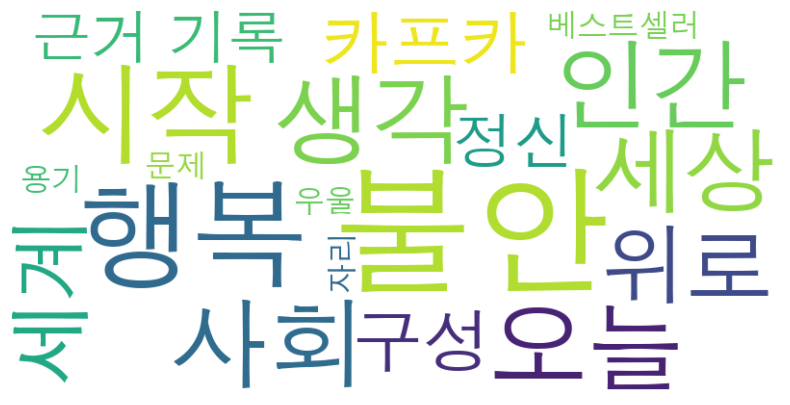

In [411]:
create_wordcloud(lda_model.components_, terms, '불안')

In [410]:
doc_topics = lda_model.transform(X)
print(doc_topics.shape)
print(doc_topics[:2])

(145, 3)
[[0.44444544 0.46246709 0.09308746]
 [0.09478423 0.09977198 0.80544379]]


In [353]:
filename_list = insecure_df['book_name']
topic_names = ['Topic #' + str(i) for i in range(1,4)]
topic_df = pd.DataFrame(data=doc_topics, columns=topic_names, index=filename_list)
topic_df.head(20)

,Topic #1,Topic #2,Topic #3
book_name,,,
불안,0.444445,0.462467,0.093087
인간 실격,0.094784,0.099772,0.805444
나는 생각이 너무 많아(춘배 에디션),0.815514,0.089356,0.095130
오늘도 망설이다 하루가 다 갔다,0.617346,0.311258,0.071396
상처 받지 않는 영혼,0.088376,0.824114,0.087510
내가 틀릴 수도 있습니다,0.121190,0.785876,0.092935
필링 그레이트,0.853032,0.074572,0.072396
나는 왜 사랑할수록 불안해질까,0.080654,0.840244,0.079102
마음이 아니라 뇌가 불안한 겁니다,0.094192,0.087932,0.817877


In [354]:
topic_modeling_results = topic_df
topic_modeling_results['max'] = topic_modeling_results.idxmax(axis=1)
topic_modeling_results['probability'] = topic_modeling_results[['Topic #1', 'Topic #2', 'Topic #3']].astype(float).max(axis=1)
topic_modeling_results

,Topic #1,Topic #2,Topic #3,max,probability
book_name,,,,,
불안,0.444445,0.462467,0.093087,Topic #2,0.462467
인간 실격,0.094784,0.099772,0.805444,Topic #3,0.805444
나는 생각이 너무 많아(춘배 에디션),0.815514,0.089356,0.095130,Topic #1,0.815514
오늘도 망설이다 하루가 다 갔다,0.617346,0.311258,0.071396,Topic #1,0.617346
상처 받지 않는 영혼,0.088376,0.824114,0.087510,Topic #2,0.824114
...,...,...,...,...,...
불안한 행복,0.104081,0.096509,0.799410,Topic #3,0.799410
나는 왜 불안한 사랑을 하는가,0.122937,0.757419,0.119644,Topic #2,0.757419
불안이 불안하다면,0.838306,0.081114,0.080580,Topic #1,0.838306


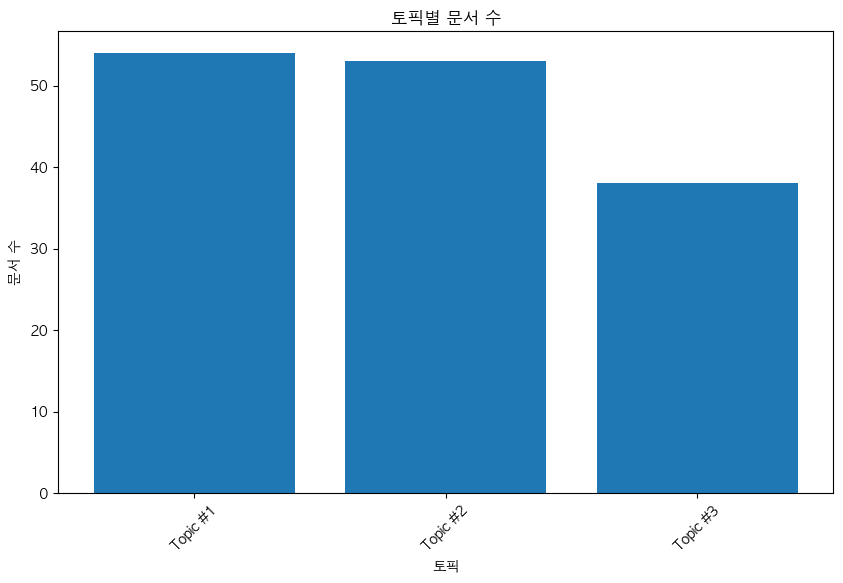

In [355]:
topic_document_counts = topic_modeling_results['max'].value_counts().reset_index()
topic_document_counts.columns = ['토픽', '문서 수']

plt.figure(figsize=(10, 6))
plt.bar(topic_document_counts['토픽'], topic_document_counts['문서 수'])
plt.title('토픽별 문서 수')
plt.xlabel('토픽')
plt.ylabel('문서 수')
plt.xticks(rotation=45)
plt.show()

In [356]:
insecure_vis = create_vis(lda_model)
pyLDAvis.save_html(insecure_df, '불안_visualization.html')
insecure_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.011207 -0.002014       1        1  37.452329
1      0.010369 -0.002546       2        1  36.495085
2      0.000838  0.004560       3        1  26.052586, topic_info=    Term       Freq      Total Category  logprob  loglift
63    불안  10.000000  10.000000  Default  30.0000  30.0000
66    사랑   4.000000   4.000000  Default  29.0000  29.0000
141   장애   4.000000   4.000000  Default  28.0000  28.0000
188   행복   3.000000   3.000000  Default  27.0000  27.0000
94    시작   3.000000   3.000000  Default  26.0000  26.0000
..   ...        ...        ...      ...      ...      ...
19    관계   0.773594   3.047489   Topic3  -5.1297  -0.0260
90    시대   0.770129   3.141172   Topic3  -5.1342  -0.0607
87   스스로   0.740788   2.677627   Topic3  -5.1730   0.0601
133   인생   0.756874   3.096872   Topic3  -5.1515  -0.0639
7     걱정   0.753068   3.150273   Topic3  -5.1566  -0.0860

[160 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.465735   가면
0         2  0.465735   가면
0         3  0.465735   가면
2         1  0.348473   가지
2         2  0.348473   가지
...     ...       ...  ...
196       2  0.386395   활용
196       3  0.386395   활용
199       1  0.409379   희망
199       2  0.409379   희망
199       3  0.409379   희망

[314 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [357]:
topic_modeling_results.reset_index(inplace=True)
topic_modeling_results

,book_name,Topic #1,Topic #2,Topic #3,max,probability
0,불안,0.444445,0.462467,0.093087,Topic #2,0.462467
1,인간 실격,0.094784,0.099772,0.805444,Topic #3,0.805444
2,나는 생각이 너무 많아(춘배 에디션),0.815514,0.089356,0.095130,Topic #1,0.815514
3,오늘도 망설이다 하루가 다 갔다,0.617346,0.311258,0.071396,Topic #1,0.617346
4,상처 받지 않는 영혼,0.088376,0.824114,0.087510,Topic #2,0.824114
...,...,...,...,...,...,...
140,불안한 행복,0.104081,0.096509,0.799410,Topic #3,0.799410
141,나는 왜 불안한 사랑을 하는가,0.122937,0.757419,0.119644,Topic #2,0.757419
142,불안이 불안하다면,0.838306,0.081114,0.080580,Topic #1,0.838306
143,21가지 발표불안 극복 시크릿,0.777612,0.112675,0.109713,Topic #1,0.777612


In [358]:
labeling_insecure_df = insecure_df
labeling_insecure_df['topic'] = topic_modeling_results['max']
labeling_insecure_df['probability'] = topic_modeling_results['probability']
labeling_insecure_df

,category,book_name,book_explain,author,publisher,publish_date,price,rate,book_imgurl,keywords,book_type,info_text,num_of_page,topic,probability
0,불안,불안,40만부 판매 기념 교보문고 단독 리커버,"알랭 드 보통 저자(글), 정영목 번역",은행나무,2012년 01월 04일,"13,500원",9.54,https://contents.kyobobook.co.kr/sih/fit-in/20...,김제동 불안감 천문학자 철학서 방송인 배우,시/에세이,"알랭 드 보통 《불안》 40만부 판매 기념 특별 리커버판 출간!배우 장동건, 방송인...",368쪽,Topic #2,0.462467
1,불안,인간 실격,(세계문학전집 103),"다자이 오사무 저자(글), 김춘미 번역",민음사,2012년 04월 10일,"8,100원",9.42,https://contents.kyobobook.co.kr/sih/fit-in/20...,세계고전문학 일본소설 직소 데카당스 작가 연보 자전적소설,소설,청춘의 한 시기를 통과 의례처럼 거쳐야 하는 일본 데카당스 문학의 대표작. 오직 순...,192쪽,Topic #3,0.805444
2,불안,나는 생각이 너무 많아(춘배 에디션),No book_explain exists,"크리스텔 프티콜랭 저자(글), 이세진 번역",부키,2023년 09월 20일,"16,200원",9.77,https://contents.kyobobook.co.kr/sih/fit-in/20...,심리 매사 보통 사람 임상 경험 과잉 경학,인문,모든 일에 의심 많고 의문 넘치고 예민한 사람들을 위한 심리 처방. “생각이 너무 ...,316쪽,Topic #1,0.815514
3,불안,오늘도 망설이다 하루가 다 갔다,No book_explain exists,"샐리 M. 윈스턴 저자(글), 마틴 N. 세이프 저자(글), 박이봄 번역",심심,2023년 06월 23일,"16,920원",9.85,https://contents.kyobobook.co.kr/sih/fit-in/20...,뇌과학 불안 망설임 심리학 이론 만성 예기,인문,“어디로 가는지 그 목적지를 미리 볼 필요는 없다. 그저 자신 앞에 놓인 1미터만...,340쪽,Topic #1,0.617346
4,불안,상처 받지 않는 영혼,내면의 자유를 위한 놓아 보내기 연습,"마이클 A. 싱어 저자(글), 이균형 번역, 성해영 감수",라이팅하우스,2014년 05월 08일,"13,500원",9.62,https://contents.kyobobook.co.kr/sih/fit-in/20...,심리치료 도덕경 불안 노자 상처 프로이트,인문,왜 모든 것은 관리하면서 영혼만은 방치하는가?. 내면의 자유를 위한 놓아 보내기 연...,301쪽,Topic #2,0.824114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,불안,불안한 행복,김미원 수필집 삶은 불안을 기억하며 행복해진다,김미원 저자(글),특별한서재,2021년 02월 25일,"12,600원",9.13,https://contents.kyobobook.co.kr/sih/fit-in/20...,감정 버지니아 울프 일상 행복 동거인 남루,시/에세이,몸으로 치열하게 써 내려간 불안한 행복의 기록!삶은 불안을 기억하며 행복해진다-깨질...,244쪽,Topic #3,0.799410
141,불안,나는 왜 불안한 사랑을 하는가,아가서에 나타난 사랑론,권요셉 저자(글),뜰힘,2023년 08월 31일,"15,300원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,아가서 구약 성서 솔로몬 히스테리 주요 주제 애착,인문,"“이 책은 진정한 사랑에 관한 이야기다.”. 사랑은 인간의 삶, 그 자체다. 우리는...",268쪽,Topic #2,0.757419
142,불안,불안이 불안하다면,No book_explain exists,"트레이시 데니스 티와리 저자(글), 양소하 번역",와이즈베리,2023년 04월 28일,"15,300원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,심리학자 추진력 저자 본인 원시인 박차 박동,인문,“불안에 대한 기존의 오해를 깨부쉈다”“평소보다 더 불안한 당신이 꼭 읽어야 할 책...,264쪽,Topic #1,0.838306
143,불안,21가지 발표불안 극복 시크릿,당당한 삶을 위한,강은영 저자(글),더로드,2022년 07월 19일,"13,500원",10.00,https://contents.kyobobook.co.kr/sih/fit-in/20...,상처치유,자기계발,발표불안으로 힘들어하는 사람들의 고민을 한방에 해결해 주는 책!!발표가 두려움이 아...,216쪽,Topic #1,0.777612


In [359]:
labeling_insecure_df.to_csv('불안_topic_labeld.csv', index=False)
labeling_insecure_df.to_excel('불안_topic_labeled.xlsx', index=False)